# 데이터 불러오기

In [1]:
### 필요한 라이브러리 임폴트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from keras.optimizers import Adam
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
plt.rc('font', family='NanumBarunGothic')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/KDT/본 프로젝트'

Mounted at /content/drive
/content/drive/MyDrive/KDT/본 프로젝트


In [5]:
### pandas read_csv()함수를 이용, 데이터 셋 생성하기
df = pd.read_csv('0727_Seoul_preprocessed.csv', encoding = 'cp949', index_col=0)

# 결과 확인
print(df.head())
print('='*100)
print(df.tail())
print('='*100)
print(df.info())

   기준_년_코드  기준_분기_코드   자치구    행정동  대분류    상권_코드    중분류         업종명  총_점포수  \
0     2022         1  서대문구  북가좌2동  서비스  2110499     의료         한의원      1   
1     2022         1   노원구   공릉1동   소매  2110433  의류/잡화          안경      1   
2     2022         1   마포구   성산1동   소매  2110548   전자기기  컴퓨터및주변장치판매      4   
3     2022         1   은평구    대조동  서비스  2110481     미용       피부관리실      3   
4     2022         1  영등포구   신길6동  서비스  2110804     교육        예술학원      5   

   점포_수  ...  개업_점포_수  폐업_률  폐업_점포_수  프랜차이즈_점포_수   총_매출_금액  분기당_매출_금액  \
0     1  ...        0     0        0           0  54003138   54003138   
1     1  ...        0     0        0           0  16150022   16150022   
2     4  ...        0     0        0           0  89813767   89813767   
3     3  ...        1     0        0           0   4619842    4619842   
4     5  ...        0     0        0           0   5946480    5946480   

   주중_매출_금액  주말_매출_금액  남성_매출_금액  여성_매출_금액  
0  35504845  18498293   8791373  45211765  
1  1467465

In [6]:
# 이런저런 전처리

# 컬럼명 바꾸기
df = df.rename(columns = {'남성_매출_금액' : '남성매출금액',
                          '여성_매출_금액' : '여성매출금액',
                          '점포_수' : '점포수',
                          '총_점포수' : '총 점포수',
                          '개업_점포_수' : '개업점포수',
                          '폐업_점포_수' : '폐업점포수',
                          '프랜차이즈_점포_수' : '프랜차이즈 수',
                          '개업_율' : '개업률',
                          '폐업_률' : '폐업률'})

# df에 분기, 상반기/하반기 추가
df['분기'] = df['기준_년_코드'].astype(str) + '-' + df['기준_분기_코드'].astype(str)
df['반기'] = df['기준_분기_코드'].map({1:'상반기', 2:'상반기', 3:'하반기', 4:'하반기'})
df['반기'] = df['기준_년_코드'].astype(str) + ' ' + df['반기']

df.columns

Index(['기준_년_코드', '기준_분기_코드', '자치구', '행정동', '대분류', '상권_코드', '중분류', '업종명',
       '총 점포수', '점포수', '순점포증감률', '개업률', '개업점포수', '폐업률', '폐업점포수', '프랜차이즈 수',
       '총_매출_금액', '분기당_매출_금액', '주중_매출_금액', '주말_매출_금액', '남성매출금액', '여성매출금액',
       '분기', '반기'],
      dtype='object')

In [7]:
# 분기별 내림차순 정렬
df = df.sort_values(by=['기준_년_코드', '기준_분기_코드'], ascending=True).reset_index().drop('index', axis=1)
# df

In [8]:
# 압구정동만 남김
df_ap = df[df.행정동=='압구정동'].reset_index().drop('index', axis=1)

# df_ap

In [9]:
# 분기별 업종별 매출금액 합치기

df_ap_quarter = df_ap.groupby(['분기', '대분류', '중분류', '업종명', '행정동'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 제과점

In [10]:
# 제과점만 남기기
ap_bread = df_ap_quarter[df_ap_quarter.업종명 == '제과점'].reset_index().drop('index', axis=1)
ap_bread

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수
0,2017-1,외식,카페/베이커리,제과점,압구정동,3731530820,43,0,1
1,2017-2,외식,카페/베이커리,제과점,압구정동,3623319125,41,2,4
2,2017-3,외식,카페/베이커리,제과점,압구정동,2905628443,46,6,1
3,2017-4,외식,카페/베이커리,제과점,압구정동,2526568446,46,2,2
4,2018-1,외식,카페/베이커리,제과점,압구정동,2684990990,47,2,1
5,2018-2,외식,카페/베이커리,제과점,압구정동,2800232390,46,0,1
6,2018-3,외식,카페/베이커리,제과점,압구정동,2579295371,49,3,0
7,2018-4,외식,카페/베이커리,제과점,압구정동,2529119785,50,2,1
8,2019-1,외식,카페/베이커리,제과점,압구정동,1688950309,49,3,4
9,2019-2,외식,카페/베이커리,제과점,압구정동,1623336688,47,0,2


## 지표 만들기 : 성장성, 순점포증감률, 시장성

In [11]:
# 기초구역 단위별 선택 업종의 전분기 대비 당기의 매출 증감률을 비교하여 성장 정도를 판단
# 성장성 = 당기 매출액 / 전분기 매출액

# 성장성 추가
# shift() 사용. 참고 : https://seong6496.tistory.com/216

ap_bread['성장성'] = ap_bread['분기당_매출_금액'] / ap_bread['분기당_매출_금액'].shift(1)
# 성장성이 1 이하면 지난분기 대비 이번분기 매출이 줄어든 것. 1 이상이어야 해당 분기 매출 상승.


# # 17년도 1분기 성장성 값은 1로 임의로 정한다. 구할 수가 없어서...
ap_bread['성장성'][0] = 1

ap_bread

<ipython-input-11-b7c996823330>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bread['성장성'][0] = 1


,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성
0,2017-1,외식,카페/베이커리,제과점,압구정동,3731530820,43,0,1,1.000000
1,2017-2,외식,카페/베이커리,제과점,압구정동,3623319125,41,2,4,0.971001
2,2017-3,외식,카페/베이커리,제과점,압구정동,2905628443,46,6,1,0.801925
3,2017-4,외식,카페/베이커리,제과점,압구정동,2526568446,46,2,2,0.869543
4,2018-1,외식,카페/베이커리,제과점,압구정동,2684990990,47,2,1,1.062703
5,2018-2,외식,카페/베이커리,제과점,압구정동,2800232390,46,0,1,1.042921
6,2018-3,외식,카페/베이커리,제과점,압구정동,2579295371,49,3,0,0.921100
7,2018-4,외식,카페/베이커리,제과점,압구정동,2529119785,50,2,1,0.980547
8,2019-1,외식,카페/베이커리,제과점,압구정동,1688950309,49,3,4,0.667802
9,2019-2,외식,카페/베이커리,제과점,압구정동,1623336688,47,0,2,0.961151


In [12]:
# 개업률, 폐업률, 순점포증감률 추가

ap_bread['개업률'] = (ap_bread['개업점포수'] / ap_bread['총 점포수']) * 100
ap_bread['폐업률'] = (ap_bread['폐업점포수'] / ap_bread['총 점포수']) * 100
ap_bread['순점포증감률'] = ((ap_bread['개업점포수'] - ap_bread['폐업점포수']) / ap_bread['총 점포수']) * 100

ap_bread

,분기,대분류,중분류,업종명,행정동,분기당_매출_금액,총 점포수,개업점포수,폐업점포수,성장성,개업률,폐업률,순점포증감률
0,2017-1,외식,카페/베이커리,제과점,압구정동,3731530820,43,0,1,1.000000,0.000000,2.325581,-2.325581
1,2017-2,외식,카페/베이커리,제과점,압구정동,3623319125,41,2,4,0.971001,4.878049,9.756098,-4.878049
2,2017-3,외식,카페/베이커리,제과점,압구정동,2905628443,46,6,1,0.801925,13.043478,2.173913,10.869565
3,2017-4,외식,카페/베이커리,제과점,압구정동,2526568446,46,2,2,0.869543,4.347826,4.347826,0.000000
4,2018-1,외식,카페/베이커리,제과점,압구정동,2684990990,47,2,1,1.062703,4.255319,2.127660,2.127660
5,2018-2,외식,카페/베이커리,제과점,압구정동,2800232390,46,0,1,1.042921,0.000000,2.173913,-2.173913
6,2018-3,외식,카페/베이커리,제과점,압구정동,2579295371,49,3,0,0.921100,6.122449,0.000000,6.122449
7,2018-4,외식,카페/베이커리,제과점,압구정동,2529119785,50,2,1,0.980547,4.000000,2.000000,2.000000
8,2019-1,외식,카페/베이커리,제과점,압구정동,1688950309,49,3,4,0.667802,6.122449,8.163265,-2.040816
9,2019-2,외식,카페/베이커리,제과점,압구정동,1623336688,47,0,2,0.961151,0.000000,4.255319,-4.255319


In [13]:
# 시장성 추가
# 기초구역 단위별 점포당 평균 매출을 시군구의 평균 매출과 비교하여 시군구 평균 대비 시장성을 판단
# 시장성 = (행정동 내 분기 매출액 / 분기 점포수) - (자치구 내 분기 매출액 / 분기 점포수)



################################################################################################################################################################################################

# 자치구 평균 매출을 구하기 위해, 원본 데이터로 잠깐 작업하겠습니다
df_gangnam = df[df['자치구'] == '강남구']

# 자치구 분기별 업종별 매출금액 합치기
df_gangnam_quarter = df_gangnam.groupby(['분기', '자치구', '대분류', '중분류', '업종명'])['분기당_매출_금액', '총 점포수', '개업점포수', '폐업점포수'].sum().reset_index()

# 제과점만 남기기
gangnam_bread = df_gangnam_quarter[df_gangnam_quarter['업종명'] == '제과점'].reset_index()

################################################################################################################################################################################################

ap_bread['시장성'] = (ap_bread['분기당_매출_금액'] / ap_bread['총 점포수']) - (gangnam_bread['분기당_매출_금액'] / gangnam_bread['총 점포수'])

ap_bread = ap_bread[['분기', '업종명','분기당_매출_금액', '성장성', '순점포증감률', '시장성']]
ap_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,3731530820,1.000000,-2.325581,-1.583285e+07
1,2017-2,제과점,3623319125,0.971001,-4.878049,-8.778678e+06
2,2017-3,제과점,2905628443,0.801925,10.869565,-3.284640e+07
3,2017-4,제과점,2526568446,0.869543,0.000000,-4.033535e+07
4,2018-1,제과점,2684990990,1.062703,2.127660,-4.031072e+07
5,2018-2,제과점,2800232390,1.042921,-2.173913,-3.590358e+07
6,2018-3,제과점,2579295371,0.921100,6.122449,-4.925466e+07
7,2018-4,제과점,2529119785,0.980547,2.000000,-5.855313e+07
8,2019-1,제과점,1688950309,0.667802,-2.040816,-4.956561e+07
9,2019-2,제과점,1623336688,0.961151,-4.255319,-4.427605e+07


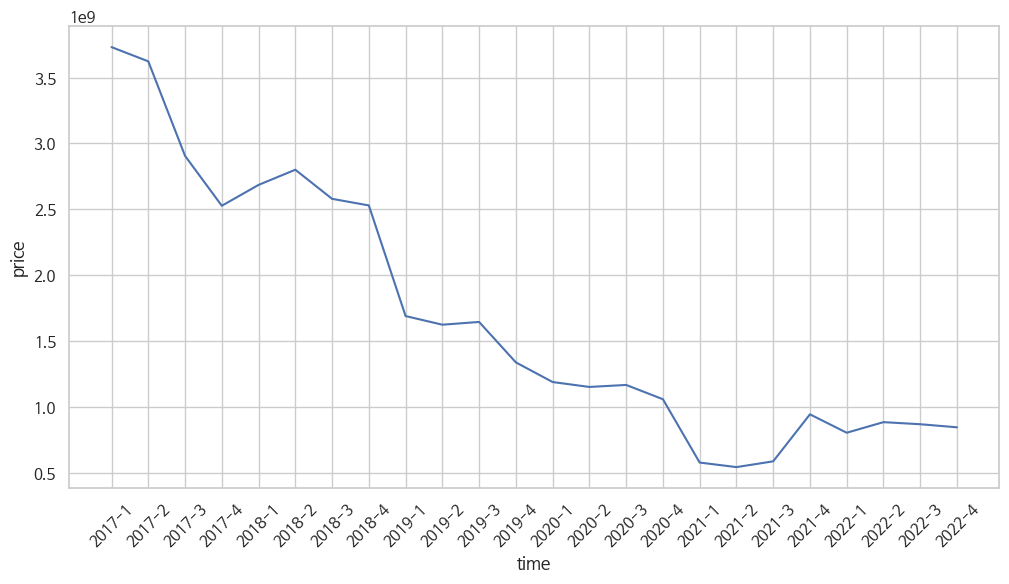

In [14]:
### seaborn lineplot을 이용, 전체 매출 시각화

# 시각화에 필요한 matplotlib.pyplot, seaborn 라이브러리 임폴트
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화
sns.set(style="whitegrid", color_codes=True, font='NanumBarunGothic')

plt.figure(figsize=(12, 6))
sns.lineplot(x=ap_bread['분기'], y=ap_bread['분기당_매출_금액'])
plt.xlabel('time')
plt.xticks(rotation=45)
plt.ylabel('price')
plt.show()

## 23년 1분기 매출 예측

In [15]:
# 총 매출액을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_bread[['성장성', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -1.583285e+07  -2.325581
1   0.971001 -8.778678e+06  -4.878049
2   0.801925 -3.284640e+07  10.869565
3   0.869543 -4.033535e+07   0.000000
4   1.062703 -4.031072e+07   2.127660
5   1.042921 -3.590358e+07  -2.173913
6   0.921100 -4.925466e+07   6.122449
7   0.980547 -5.855313e+07   2.000000
8   0.667802 -4.956561e+07  -2.040816
9   0.961151 -4.427605e+07  -4.255319
10  1.012891 -4.739028e+07   2.083333
11  0.813246 -5.390225e+07  -2.173913
12  0.888377 -4.763333e+07  -4.166667
13  0.968514 -4.414900e+07  -7.692308
14  1.013305 -4.197172e+07   2.500000
15  0.906953 -4.556414e+07   6.976744
16  0.545138 -4.979097e+07  -4.878049
17  0.940024 -5.195889e+07  -6.250000
18  1.080821 -5.466979e+07   0.000000
19  1.609612 -5.073234e+07   3.030303
20  0.851711 -4.915105e+07   2.941176
21  1.100205 -4.985924e+07   0.000000
22  0.982082 -5.355161e+07   0.000000
23  0.973102 -5.072695e+07   8.108108
--------------------------------------------------

In [16]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [17]:
### 시계열 분석에 적합한 데이터를 만들어 주는 함수 정의
def make_dataset(X, y, window_size=10):
    X_data = []
    y_data = []
    for start in np.arange(len(X) - window_size):
        stop = start + window_size
        X_data.append(X[start:stop, :])
        y_data.append(y[stop])
    return np.array(X_data), np.array(y_data)




### 시계열 분석에서 마지막 테스트 데이터를 만들어 주는 함수 정의
def make_last_dataset(X, window_size=10):
    X_data_last = []
    for start in np.arange(len(X) - window_size +1):
        stop = start + window_size
        X_data_last.append(X[start:stop, :])
    return X_data_last[-1]

In [18]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [19]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.41047927 0.10048358 0.41441441]
 [0.40204254 0.1572329  0.85122961]]


In [20]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [21]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             17408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [22]:
### 모델 학습

# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2709
Epoch 1: val_loss improved from inf to 0.00914, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2709 - val_loss: 0.0091
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2606
Epoch 2: val_loss improved from 0.00914 to 0.00801, saving model to stock_model.h5
1/1 [==============================] - 0s 84ms/step - loss: 0.2606 - val_loss: 0.0080
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2507
Epoch 3: val_loss improved from 0.00801 to 0.00707, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2507 - val_loss: 0.0071
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2411
Epoch 4: val_loss improved from 0.00707 to 0.00631, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2411 - val_loss: 0.0063
Epoch 5/100
1/1 [=================

In [23]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 668ms/step
[[0.06994469]
 [0.07459153]
 [0.06437556]
 [0.06387739]]


In [24]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.081831,0.069945
2022-2,0.107052,0.074592
2022-3,0.102090,0.064376
2022-4,0.094775,0.063877


In [25]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.081831,0.069945,802848413,764936320.0,37912093.0
2022-2,0.107052,0.074592,883298113,779758272.0,103539841.0
2022-3,0.102090,0.064376,867471538,747172416.0,120299122.0
2022-4,0.094775,0.063877,844138041,745583424.0,98554617.0


In [26]:
df_test = df_test.reset_index()

### 결과

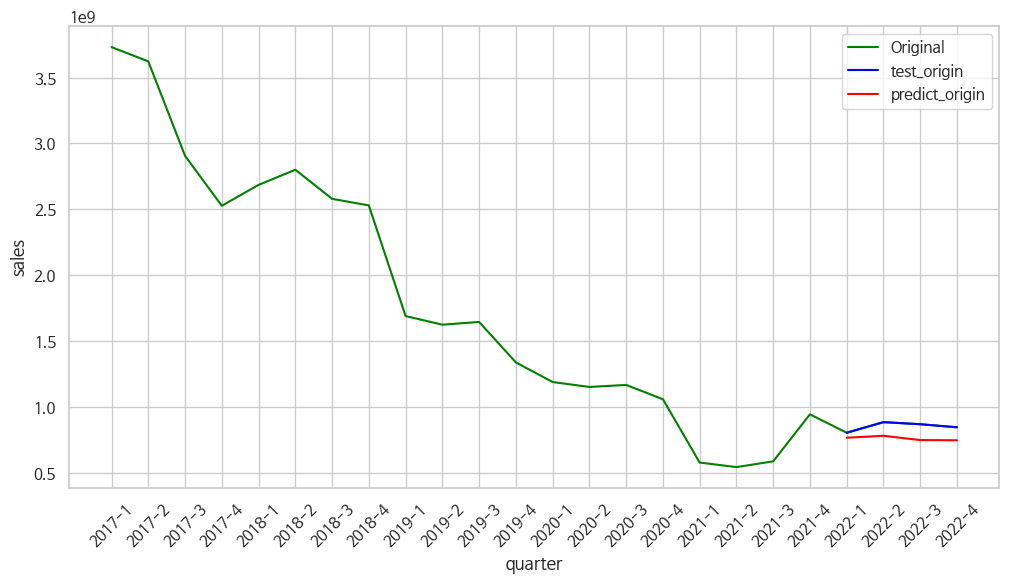

In [27]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [28]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     9.007642e+07
std      3.599848e+07
min      3.791209e+07
25%      8.339399e+07
50%      1.010472e+08
75%      1.077297e+08
max      1.202991e+08
dtype: float64

In [29]:
### 23년 1분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 23ms/step
[[0.06807441]]
--------------------------------------------------------------------------------
예측된 매출  : 758970624.0 


## 23년 1분기 성장성 예측

In [30]:
# 성장을 예측하기 위한 지표로는 성장성, 안정성, 시장성, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

     분기당_매출_금액           시장성     순점포증감률
0   3731530820 -1.583285e+07  -2.325581
1   3623319125 -8.778678e+06  -4.878049
2   2905628443 -3.284640e+07  10.869565
3   2526568446 -4.033535e+07   0.000000
4   2684990990 -4.031072e+07   2.127660
5   2800232390 -3.590358e+07  -2.173913
6   2579295371 -4.925466e+07   6.122449
7   2529119785 -5.855313e+07   2.000000
8   1688950309 -4.956561e+07  -2.040816
9   1623336688 -4.427605e+07  -4.255319
10  1644263157 -4.739028e+07   2.083333
11  1337189760 -5.390225e+07  -2.173913
12  1187928057 -4.763333e+07  -4.166667
13  1150524736 -4.414900e+07  -7.692308
14  1165832531 -4.197172e+07   2.500000
15  1057355784 -4.556414e+07   6.976744
16   576404404 -4.979097e+07  -4.878049
17   541833906 -5.195889e+07  -6.250000
18   585625611 -5.466979e+07   0.000000
19   942630189 -5.073234e+07   3.030303
20   802848413 -4.915105e+07   2.941176
21   883298113 -4.985924e+07   0.000000
22   867471538 -5.355161e+07   0.000000
23   844138041 -5.072695e+07   8.108108


In [31]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [32]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [33]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.10209046 0.10048358 0.41441441]
 [0.09477519 0.1572329  0.85122961]]


In [34]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [35]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1525
Epoch 1: val_loss improved from inf to 0.30347, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1525 - val_loss: 0.3035
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1443
Epoch 2: val_loss improved from 0.30347 to 0.29703, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1443 - val_loss: 0.2970
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1363
Epoch 3: val_loss improved from 0.29703 to 0.29078, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.1363 - val_loss: 0.2908
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1288
Epoch 4: val_loss improved from 0.29078 to 0.28470, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1288 - val_loss: 0.2847
Epoch 5/100
1/1 [=================

In [37]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 821ms/step
[[0.29461965]
 [0.32873756]
 [0.31570873]
 [0.296493  ]]


In [38]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.288004,0.294620
2022-2,0.521448,0.328738
2022-3,0.410479,0.315709
2022-4,0.402043,0.296493


In [39]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 3].values       # 성장성이 ap_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.288004,0.294620,0.851711,0.858753,-0.007042
2022-2,0.521448,0.328738,1.100205,0.895070,0.205135
2022-3,0.410479,0.315709,0.982082,0.881202,0.100881
2022-4,0.402043,0.296493,0.973102,0.860747,0.112355


### 결과

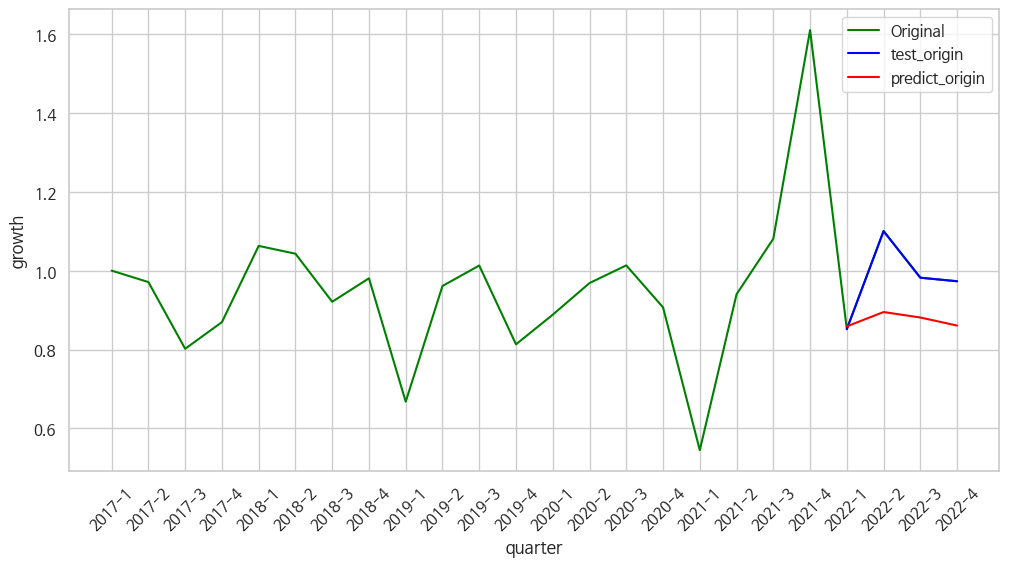

In [40]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [41]:
## error의 요약 통계량
error.describe()

count    4.000000
mean     0.102832
std      0.086857
min     -0.007042
25%      0.073900
50%      0.106618
75%      0.135550
max      0.205135
dtype: float64

In [42]:
### 23년 1분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 25ms/step
[[0.3212749]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.887126624584198 


## 23년 1분기 시장성 예측

In [43]:
# 시장성을 예측하기 위한 지표로는 성장성, 안정성, 총매출, 순점포증감률 선정. => 안정성 제외!

### X / y 데이터 생성
X = ap_bread[['성장성', '분기당_매출_금액', '순점포증감률']]
y = ap_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액     순점포증감률
0   1.000000  3731530820  -2.325581
1   0.971001  3623319125  -4.878049
2   0.801925  2905628443  10.869565
3   0.869543  2526568446   0.000000
4   1.062703  2684990990   2.127660
5   1.042921  2800232390  -2.173913
6   0.921100  2579295371   6.122449
7   0.980547  2529119785   2.000000
8   0.667802  1688950309  -2.040816
9   0.961151  1623336688  -4.255319
10  1.012891  1644263157   2.083333
11  0.813246  1337189760  -2.173913
12  0.888377  1187928057  -4.166667
13  0.968514  1150524736  -7.692308
14  1.013305  1165832531   2.500000
15  0.906953  1057355784   6.976744
16  0.545138   576404404  -4.878049
17  0.940024   541833906  -6.250000
18  1.080821   585625611   0.000000
19  1.609612   942630189   3.030303
20  0.851711   802848413   2.941176
21  1.100205   883298113   0.000000
22  0.982082   867471538   0.000000
23  0.973102   844138041   8.108108
--------------------------------------------------------------------------------
             시장성
0 

In [44]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [45]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [46]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.41047927 0.10209046 0.41441441]
 [0.40204254 0.09477519 0.85122961]]


In [47]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [48]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [49]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1092
Epoch 1: val_loss improved from inf to 0.03028, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1092 - val_loss: 0.0303
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1024
Epoch 2: val_loss improved from 0.03028 to 0.02761, saving model to stock_model.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.1024 - val_loss: 0.0276
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0960
Epoch 3: val_loss improved from 0.02761 to 0.02510, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.0960 - val_loss: 0.0251
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0900
Epoch 4: val_loss improved from 0.02510 to 0.02276, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.0900 - val_loss: 0.0228
Epoch 5/100
1/1 [=================

In [50]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 622ms/step
[[0.18750067]
 [0.2046596 ]
 [0.17797574]
 [0.17620648]]


In [51]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.188894,0.187501
2022-2,0.174666,0.204660
2022-3,0.100484,0.177976
2022-4,0.157233,0.176206


In [52]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 5].values       # 시장성이 ap_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.188894,0.187501,-4.915105e+07,-49220384.0,6.933097e+04
2022-2,0.174666,0.204660,-4.985924e+07,-48366308.0,-1.492936e+06
2022-3,0.100484,0.177976,-5.355161e+07,-49694484.0,-3.857129e+06
2022-4,0.157233,0.176206,-5.072695e+07,-49782548.0,-9.443987e+05


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


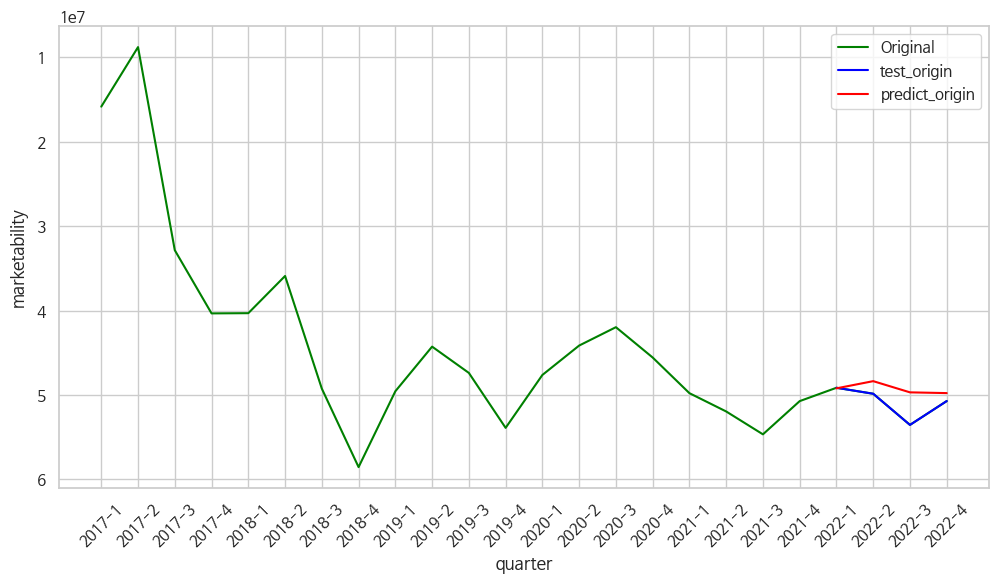

In [53]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [54]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.556283e+06
std      1.664825e+06
min     -3.857129e+06
25%     -2.083984e+06
50%     -1.218667e+06
75%     -6.909662e+05
max      6.933097e+04
dtype: float64

In [55]:
### 23년 1분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 19ms/step
[[0.18607016]]
--------------------------------------------------------------------------------
예측된 시장성  : -49291588.0 


## 23년 1분기 순점포증감률 예측

In [56]:
# 순점포증감률을 예측하기 위한 지표로는 성장성, 총매출, 시장성 선정

### X / y 데이터 생성
X = ap_bread[['성장성', '분기당_매출_금액', '시장성']]
y = ap_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성   분기당_매출_금액           시장성
0   1.000000  3731530820 -1.583285e+07
1   0.971001  3623319125 -8.778678e+06
2   0.801925  2905628443 -3.284640e+07
3   0.869543  2526568446 -4.033535e+07
4   1.062703  2684990990 -4.031072e+07
5   1.042921  2800232390 -3.590358e+07
6   0.921100  2579295371 -4.925466e+07
7   0.980547  2529119785 -5.855313e+07
8   0.667802  1688950309 -4.956561e+07
9   0.961151  1623336688 -4.427605e+07
10  1.012891  1644263157 -4.739028e+07
11  0.813246  1337189760 -5.390225e+07
12  0.888377  1187928057 -4.763333e+07
13  0.968514  1150524736 -4.414900e+07
14  1.013305  1165832531 -4.197172e+07
15  0.906953  1057355784 -4.556414e+07
16  0.545138   576404404 -4.979097e+07
17  0.940024   541833906 -5.195889e+07
18  1.080821   585625611 -5.466979e+07
19  1.609612   942630189 -5.073234e+07
20  0.851711   802848413 -4.915105e+07
21  1.100205   883298113 -4.985924e+07
22  0.982082   867471538 -5.355161e+07
23  0.973102   844138041 -5.072695e+07
-------------------------

In [57]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (24, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (24, 1)


In [58]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')

X_data 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (22, 1)


In [59]:
### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

[[0.41047927 0.10209046 0.10048358]
 [0.40204254 0.09477519 0.1572329 ]]


In [60]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (18, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (18, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (18, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [61]:
# 필요한 라이브러리 임폴트
import tensorflow as tf
import random

# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [62]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2745
Epoch 1: val_loss improved from inf to 0.23276, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2745 - val_loss: 0.2328
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2637
Epoch 2: val_loss improved from 0.23276 to 0.22659, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2637 - val_loss: 0.2266
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2533
Epoch 3: val_loss improved from 0.22659 to 0.22062, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.2533 - val_loss: 0.2206
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2433
Epoch 4: val_loss improved from 0.22062 to 0.21482, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2433 - val_loss: 0.2148
Epoch 5/100
1/1 [=================

In [63]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 598ms/step
[[0.3825999 ]
 [0.43092   ]
 [0.36350137]
 [0.37770593]]


In [64]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-1,0.572867,0.382600
2022-2,0.414414,0.430920
2022-3,0.414414,0.363501
2022-4,0.851230,0.377706


In [65]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-1,0.572867,0.382600,2.941176,-0.590537,3.531714
2022-2,0.414414,0.430920,0.000000,0.306375,-0.306375
2022-3,0.414414,0.363501,0.000000,-0.945041,0.945041
2022-4,0.851230,0.377706,8.108108,-0.681378,8.789486


### 결과

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


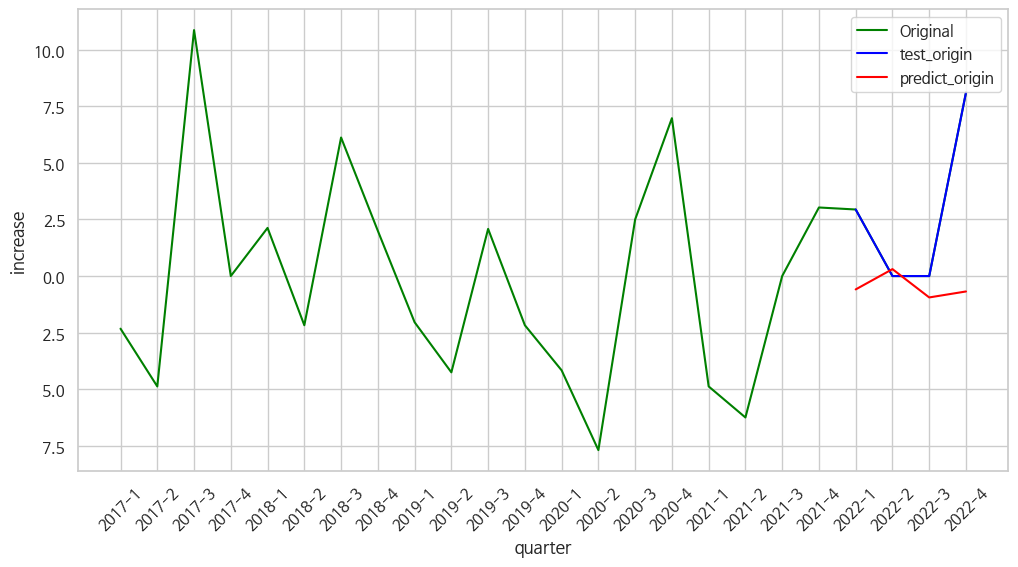

In [66]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [67]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     3.239967
std      4.030116
min     -0.306375
25%      0.632187
50%      2.238378
75%      4.846157
max      8.789486
dtype: float64

In [68]:
### 23년 1분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.35532057]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.0968923568725586 


## 원본 데이터에 예측값 추가하기

In [69]:
print(sales)
print(growth)
print(marketability)
print(increase)

758970600.0
0.8871266
-49291588.0
-1.0968924


In [70]:
ap_bread.loc[24] = ['2023-1', '제과점', sales, growth, increase, marketability]

<ipython-input-70-cc9d99f99ec7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bread.loc[24] = ['2023-1', '제과점', sales, growth, increase, marketability]


In [71]:
ap_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,3.731531e+09,1.000000,-2.325581,-1.583285e+07
1,2017-2,제과점,3.623319e+09,0.971001,-4.878049,-8.778678e+06
2,2017-3,제과점,2.905628e+09,0.801925,10.869565,-3.284640e+07
3,2017-4,제과점,2.526568e+09,0.869543,0.000000,-4.033535e+07
4,2018-1,제과점,2.684991e+09,1.062703,2.127660,-4.031072e+07
5,2018-2,제과점,2.800232e+09,1.042921,-2.173913,-3.590358e+07
6,2018-3,제과점,2.579295e+09,0.921100,6.122449,-4.925466e+07
7,2018-4,제과점,2.529120e+09,0.980547,2.000000,-5.855313e+07
8,2019-1,제과점,1.688950e+09,0.667802,-2.040816,-4.956561e+07
9,2019-2,제과점,1.623337e+09,0.961151,-4.255319,-4.427605e+07


## 23년 2분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [72]:
### X / y 데이터 생성
X = ap_bread[['성장성', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -1.583285e+07  -2.325581
1   0.971001 -8.778678e+06  -4.878049
2   0.801925 -3.284640e+07  10.869565
3   0.869543 -4.033535e+07   0.000000
4   1.062703 -4.031072e+07   2.127660
5   1.042921 -3.590358e+07  -2.173913
6   0.921100 -4.925466e+07   6.122449
7   0.980547 -5.855313e+07   2.000000
8   0.667802 -4.956561e+07  -2.040816
9   0.961151 -4.427605e+07  -4.255319
10  1.012891 -4.739028e+07   2.083333
11  0.813246 -5.390225e+07  -2.173913
12  0.888377 -4.763333e+07  -4.166667
13  0.968514 -4.414900e+07  -7.692308
14  1.013305 -4.197172e+07   2.500000
15  0.906953 -4.556414e+07   6.976744
16  0.545138 -4.979097e+07  -4.878049
17  0.940024 -5.195889e+07  -6.250000
18  1.080821 -5.466979e+07   0.000000
19  1.609612 -5.073234e+07   3.030303
20  0.851711 -4.915105e+07   2.941176
21  1.100205 -4.985924e+07   0.000000
22  0.982082 -5.355161e+07   0.000000
23  0.973102 -5.072695e+07   8.108108
24  0.887127 -4.929159e+07  -1.096892
------------

In [73]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [74]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.40204254 0.1572329  0.85122961]
 [0.32127491 0.18607016 0.35532057]]


In [75]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [76]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 2, 64)             17408     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [77]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2538
Epoch 1: val_loss improved from inf to 0.00484, saving model to stock_model.h5
1/1 [==============================] - 3s 3s/step - loss: 0.2538 - val_loss: 0.0048
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2441
Epoch 2: val_loss improved from 0.00484 to 0.00398, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2441 - val_loss: 0.0040
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2347
Epoch 3: val_loss improved from 0.00398 to 0.00331, saving model to stock_model.h5
1/1 [==============================] - 0s 75ms/step - loss: 0.2347 - val_loss: 0.0033
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2256
Epoch 4: val_loss improved from 0.00331 to 0.00283, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2256 - val_loss: 0.0028
Epoch 5/100
1/1 [=================

In [78]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 678ms/step
[[0.05136521]
 [0.04416449]
 [0.0443681 ]
 [0.04741554]]


In [79]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.107052,0.051365
2022-3,0.102090,0.044164
2022-4,0.094775,0.044368
2023-1,0.068074,0.047416


In [80]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.107052,0.051365,883298113.0,705673408.0,177624705.0
2022-3,0.102090,0.044164,867471538.0,682705280.0,184766258.0
2022-4,0.094775,0.044368,844138041.0,683354752.0,160783289.0
2023-1,0.068074,0.047416,758970624.0,693075136.0,65895488.0


In [81]:
df_test = df_test.reset_index()

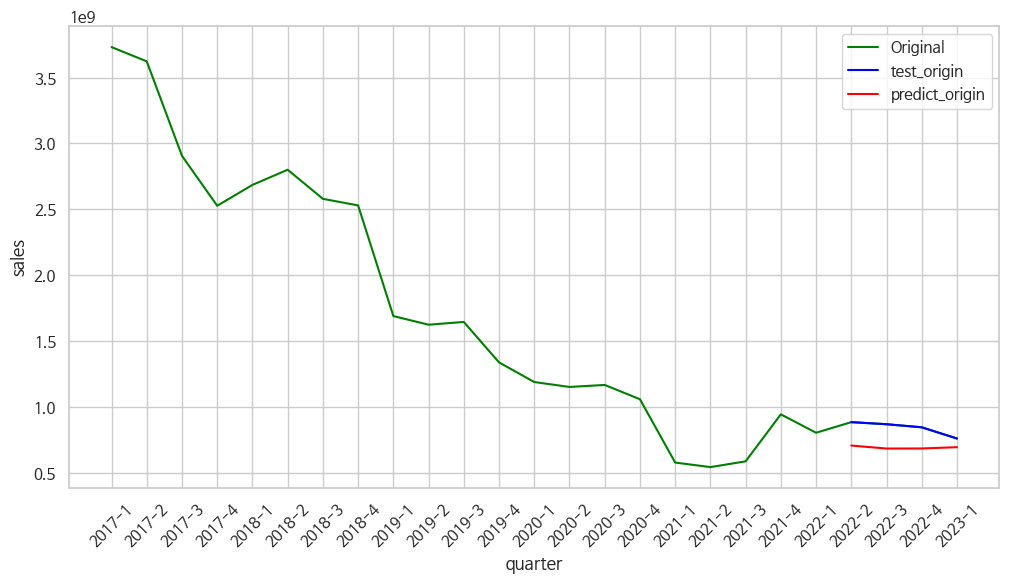

In [82]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [83]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     1.472674e+08
std      5.517185e+07
min      6.589549e+07
25%      1.370613e+08
50%      1.692040e+08
75%      1.794101e+08
max      1.847663e+08
dtype: float64

In [84]:
### 23년 2분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 18ms/step
[[0.0475754]]
--------------------------------------------------------------------------------
예측된 매출  : 693585024.0 


### 성장성

In [85]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   3.731531e+09 -1.583285e+07  -2.325581
1   3.623319e+09 -8.778678e+06  -4.878049
2   2.905628e+09 -3.284640e+07  10.869565
3   2.526568e+09 -4.033535e+07   0.000000
4   2.684991e+09 -4.031072e+07   2.127660
5   2.800232e+09 -3.590358e+07  -2.173913
6   2.579295e+09 -4.925466e+07   6.122449
7   2.529120e+09 -5.855313e+07   2.000000
8   1.688950e+09 -4.956561e+07  -2.040816
9   1.623337e+09 -4.427605e+07  -4.255319
10  1.644263e+09 -4.739028e+07   2.083333
11  1.337190e+09 -5.390225e+07  -2.173913
12  1.187928e+09 -4.763333e+07  -4.166667
13  1.150525e+09 -4.414900e+07  -7.692308
14  1.165833e+09 -4.197172e+07   2.500000
15  1.057356e+09 -4.556414e+07   6.976744
16  5.764044e+08 -4.979097e+07  -4.878049
17  5.418339e+08 -5.195889e+07  -6.250000
18  5.856256e+08 -5.466979e+07   0.000000
19  9.426302e+08 -5.073234e+07   3.030303
20  8.028484e+08 -4.915105e+07   2.941176
21  8.832981e+08 -4.985924e+07   0.000000
22  8.674715e+08 -5.355161e+07   0

In [86]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [87]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.09477519 0.1572329  0.85122961]
 [0.0680744  0.18607016 0.35532057]]


In [88]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [89]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [90]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1507
Epoch 1: val_loss improved from inf to 0.29607, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.1507 - val_loss: 0.2961
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1426
Epoch 2: val_loss improved from 0.29607 to 0.28981, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.1426 - val_loss: 0.2898
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1348
Epoch 3: val_loss improved from 0.28981 to 0.28375, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.1348 - val_loss: 0.2838
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1274
Epoch 4: val_loss improved from 0.28375 to 0.27788, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.1274 - val_loss: 0.2779
Epoch 5/100
1/1 [=================

In [91]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 820ms/step
[[0.33106744]
 [0.31814736]
 [0.29884458]
 [0.32368737]]


In [92]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.521448,0.331067
2022-3,0.410479,0.318147
2022-4,0.402043,0.298845
2023-1,0.321275,0.323687


In [93]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 3].values       # 성장성이 ap_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.521448,0.331067,1.100205,0.897551,0.202655
2022-3,0.410479,0.318147,0.982082,0.883797,0.098285
2022-4,0.402043,0.298845,0.973102,0.863250,0.109852
2023-1,0.321275,0.323687,0.887127,0.889695,-0.002568


In [94]:
df_test = df_test.reset_index()

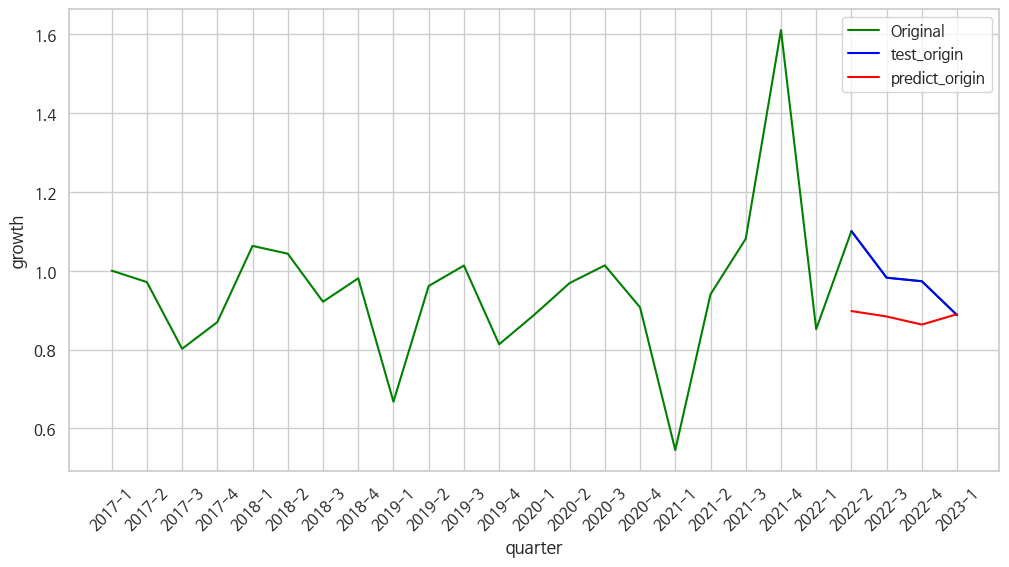

In [95]:
### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [96]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.102056
std      0.083947
min     -0.002568
25%      0.073072
50%      0.104068
75%      0.133052
max      0.202655
dtype: float64

In [97]:
### 23년 2분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 26ms/step
[[0.34612298]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.9135767221450806 


### 시장성

In [98]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   3.731531e+09  1.000000  -2.325581
1   3.623319e+09  0.971001  -4.878049
2   2.905628e+09  0.801925  10.869565
3   2.526568e+09  0.869543   0.000000
4   2.684991e+09  1.062703   2.127660
5   2.800232e+09  1.042921  -2.173913
6   2.579295e+09  0.921100   6.122449
7   2.529120e+09  0.980547   2.000000
8   1.688950e+09  0.667802  -2.040816
9   1.623337e+09  0.961151  -4.255319
10  1.644263e+09  1.012891   2.083333
11  1.337190e+09  0.813246  -2.173913
12  1.187928e+09  0.888377  -4.166667
13  1.150525e+09  0.968514  -7.692308
14  1.165833e+09  1.013305   2.500000
15  1.057356e+09  0.906953   6.976744
16  5.764044e+08  0.545138  -4.878049
17  5.418339e+08  0.940024  -6.250000
18  5.856256e+08  1.080821   0.000000
19  9.426302e+08  1.609612   3.030303
20  8.028484e+08  0.851711   2.941176
21  8.832981e+08  1.100205   0.000000
22  8.674715e+08  0.982082   0.000000
23  8.441380e+08  0.973102   8.108108
24  7.589706e+08  0.887127  -1.096892
------------

In [99]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [100]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.09477519 0.40204254 0.85122961]
 [0.0680744  0.32127491 0.35532057]]


In [101]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [102]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [103]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1026
Epoch 1: val_loss improved from inf to 0.02696, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1026 - val_loss: 0.0270
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0962
Epoch 2: val_loss improved from 0.02696 to 0.02418, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.0962 - val_loss: 0.0242
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0901
Epoch 3: val_loss improved from 0.02418 to 0.02156, saving model to stock_model.h5
1/1 [==============================] - 0s 87ms/step - loss: 0.0901 - val_loss: 0.0216
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0844
Epoch 4: val_loss improved from 0.02156 to 0.01911, saving model to stock_model.h5
1/1 [==============================] - 0s 66ms/step - loss: 0.0844 - val_loss: 0.0191
Epoch 5/100
1/1 [=================

In [104]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 592ms/step
[[0.17066643]
 [0.15468943]
 [0.15091747]
 [0.1618062 ]]


In [105]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.174666,0.170666
2022-3,0.100484,0.154689
2022-4,0.157233,0.150917
2023-1,0.186070,0.161806


In [106]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 5].values       # 시장성이 ap_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.174666,0.170666,-4.985924e+07,-50058300.0,1.990557e+05
2022-3,0.100484,0.154689,-5.355161e+07,-50853548.0,-2.698065e+06
2022-4,0.157233,0.150917,-5.072695e+07,-51041292.0,3.143453e+05
2023-1,0.186070,0.161806,-4.929159e+07,-50499312.0,1.207724e+06


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


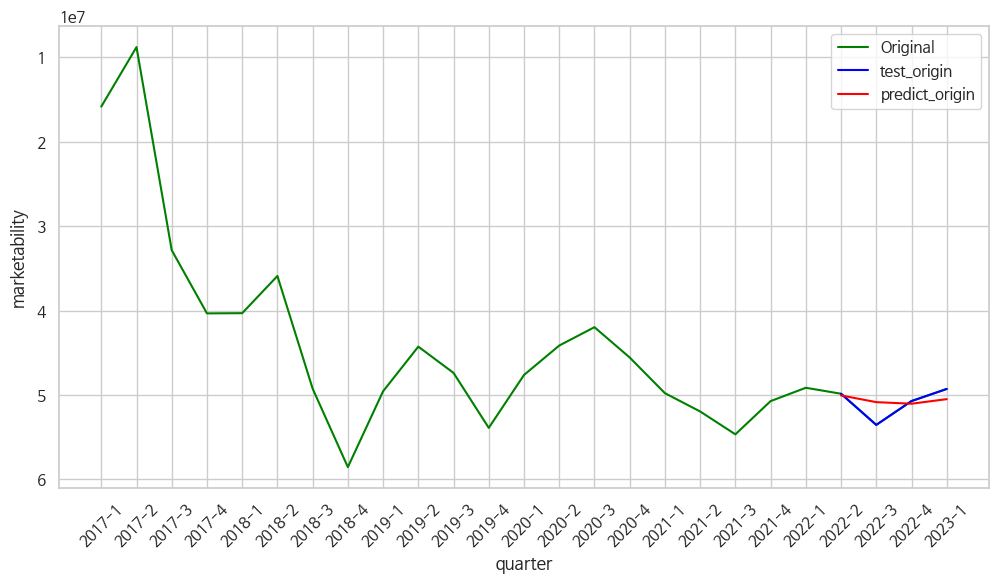

In [107]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [108]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -2.442350e+05
std      1.696858e+06
min     -2.698065e+06
25%     -5.252245e+05
50%      2.567005e+05
75%      5.376900e+05
max      1.207724e+06
dtype: float64

In [109]:
### 23년 2분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 21ms/step
[[0.16679564]]
--------------------------------------------------------------------------------
예측된 시장성  : -50250964.0 


### 순점포증감률

In [110]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '성장성', '시장성']]
y = ap_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.731531e+09  1.000000 -1.583285e+07
1   3.623319e+09  0.971001 -8.778678e+06
2   2.905628e+09  0.801925 -3.284640e+07
3   2.526568e+09  0.869543 -4.033535e+07
4   2.684991e+09  1.062703 -4.031072e+07
5   2.800232e+09  1.042921 -3.590358e+07
6   2.579295e+09  0.921100 -4.925466e+07
7   2.529120e+09  0.980547 -5.855313e+07
8   1.688950e+09  0.667802 -4.956561e+07
9   1.623337e+09  0.961151 -4.427605e+07
10  1.644263e+09  1.012891 -4.739028e+07
11  1.337190e+09  0.813246 -5.390225e+07
12  1.187928e+09  0.888377 -4.763333e+07
13  1.150525e+09  0.968514 -4.414900e+07
14  1.165833e+09  1.013305 -4.197172e+07
15  1.057356e+09  0.906953 -4.556414e+07
16  5.764044e+08  0.545138 -4.979097e+07
17  5.418339e+08  0.940024 -5.195889e+07
18  5.856256e+08  1.080821 -5.466979e+07
19  9.426302e+08  1.609612 -5.073234e+07
20  8.028484e+08  0.851711 -4.915105e+07
21  8.832981e+08  1.100205 -4.985924e+07
22  8.674715e+08  0.982082 -5.355161e+07
23  8.441380e+08

In [111]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (25, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (25, 1)


In [112]:
### 시계열 분석에 적합한 데이터 생성

# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (23, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (23, 1)
[[0.09477519 0.40204254 0.1572329 ]
 [0.0680744  0.32127491 0.18607016]]


In [113]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (19, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (19, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (19, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [114]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_15 (LSTM)              (None, 32)                12416     
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [115]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2949
Epoch 1: val_loss improved from inf to 0.18134, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2949 - val_loss: 0.1813
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2840
Epoch 2: val_loss improved from 0.18134 to 0.17566, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.2840 - val_loss: 0.1757
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2735
Epoch 3: val_loss improved from 0.17566 to 0.17017, saving model to stock_model.h5
1/1 [==============================] - 0s 111ms/step - loss: 0.2735 - val_loss: 0.1702
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2634
Epoch 4: val_loss improved from 0.17017 to 0.16485, saving model to stock_model.h5
1/1 [==============================] - 0s 95ms/step - loss: 0.2634 - val_loss: 0.1649
Epoch 5/100
1/1 [================

In [116]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 594ms/step
[[0.39982903]
 [0.34510246]
 [0.35631078]
 [0.33695084]]


In [117]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-2,0.414414,0.399829
2022-3,0.414414,0.345102
2022-4,0.851230,0.356311
2023-1,0.355321,0.336951


In [118]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-2,0.414414,0.399829,0.000000,-0.270732,0.270732
2022-3,0.414414,0.345102,0.000000,-1.286560,1.286560
2022-4,0.851230,0.356311,8.108108,-1.078512,9.186620
2023-1,0.355321,0.336951,-1.096892,-1.437869,0.340977


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


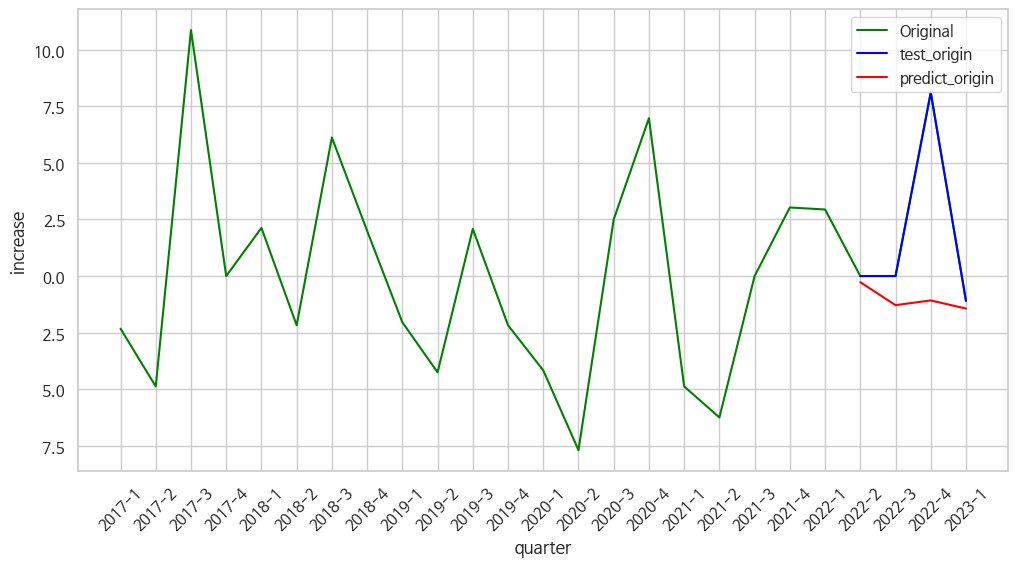

In [119]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [120]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     2.771222
std      4.301941
min      0.270732
25%      0.323416
50%      0.813768
75%      3.261575
max      9.186620
dtype: float64

In [121]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 19ms/step
[[0.34129676]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.3572005033493042 


### 추가


In [122]:
ap_bread.loc[25] = ['2023-2', '제과점', sales, growth, increase, marketability]

<ipython-input-122-3ded7daabe11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bread.loc[25] = ['2023-2', '제과점', sales, growth, increase, marketability]


In [123]:
ap_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,3.731531e+09,1.000000,-2.325581,-1.583285e+07
1,2017-2,제과점,3.623319e+09,0.971001,-4.878049,-8.778678e+06
2,2017-3,제과점,2.905628e+09,0.801925,10.869565,-3.284640e+07
3,2017-4,제과점,2.526568e+09,0.869543,0.000000,-4.033535e+07
4,2018-1,제과점,2.684991e+09,1.062703,2.127660,-4.031072e+07
5,2018-2,제과점,2.800232e+09,1.042921,-2.173913,-3.590358e+07
6,2018-3,제과점,2.579295e+09,0.921100,6.122449,-4.925466e+07
7,2018-4,제과점,2.529120e+09,0.980547,2.000000,-5.855313e+07
8,2019-1,제과점,1.688950e+09,0.667802,-2.040816,-4.956561e+07
9,2019-2,제과점,1.623337e+09,0.961151,-4.255319,-4.427605e+07


## 23년 3분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본 데이터에 추가

### 매출

In [124]:
################ 매출 ####################

### X / y 데이터 생성
X = ap_bread[['성장성', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -1.583285e+07  -2.325581
1   0.971001 -8.778678e+06  -4.878049
2   0.801925 -3.284640e+07  10.869565
3   0.869543 -4.033535e+07   0.000000
4   1.062703 -4.031072e+07   2.127660
5   1.042921 -3.590358e+07  -2.173913
6   0.921100 -4.925466e+07   6.122449
7   0.980547 -5.855313e+07   2.000000
8   0.667802 -4.956561e+07  -2.040816
9   0.961151 -4.427605e+07  -4.255319
10  1.012891 -4.739028e+07   2.083333
11  0.813246 -5.390225e+07  -2.173913
12  0.888377 -4.763333e+07  -4.166667
13  0.968514 -4.414900e+07  -7.692308
14  1.013305 -4.197172e+07   2.500000
15  0.906953 -4.556414e+07   6.976744
16  0.545138 -4.979097e+07  -4.878049
17  0.940024 -5.195889e+07  -6.250000
18  1.080821 -5.466979e+07   0.000000
19  1.609612 -5.073234e+07   3.030303
20  0.851711 -4.915105e+07   2.941176
21  1.100205 -4.985924e+07   0.000000
22  0.982082 -5.355161e+07   0.000000
23  0.973102 -5.072695e+07   8.108108
24  0.887127 -4.929159e+07  -1.096892
25  0.913577

In [125]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [126]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.32127491 0.18607016 0.35532057]
 [0.34612294 0.16679569 0.34129677]]


In [127]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [128]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_17 (LSTM)              (None, 32)                12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [129]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2370
Epoch 1: val_loss improved from inf to 0.00731, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2370 - val_loss: 0.0073
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2278
Epoch 2: val_loss improved from 0.00731 to 0.00602, saving model to stock_model.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.2278 - val_loss: 0.0060
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2190
Epoch 3: val_loss improved from 0.00602 to 0.00493, saving model to stock_model.h5
1/1 [==============================] - 0s 77ms/step - loss: 0.2190 - val_loss: 0.0049
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2105
Epoch 4: val_loss improved from 0.00493 to 0.00403, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2105 - val_loss: 0.0040
Epoch 5/100
1/1 [=================

In [130]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 771ms/step
[[0.07445532]
 [0.07369499]
 [0.07835492]
 [0.08016181]]


In [131]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.102090,0.074455
2022-4,0.094775,0.073695
2023-1,0.068074,0.078355
2023-2,0.047575,0.080162


In [132]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.102090,0.074455,867471538.0,779323840.0,88147698.0
2022-4,0.094775,0.073695,844138041.0,776898624.0,67239417.0
2023-1,0.068074,0.078355,758970624.0,791762368.0,-32791744.0
2023-2,0.047575,0.080162,693585024.0,797525760.0,-103940736.0


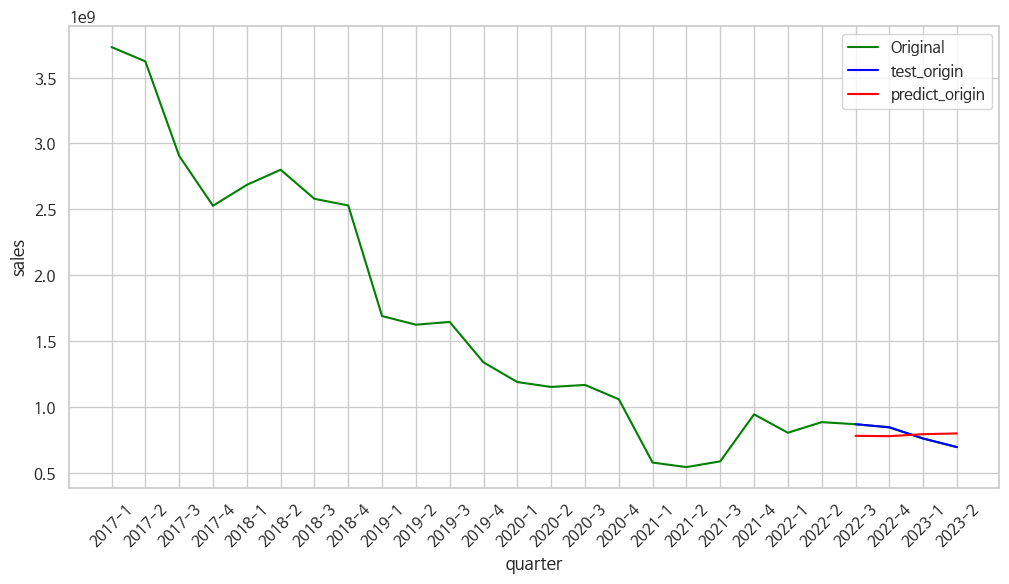

In [133]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [134]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     4.663659e+06
std      8.959749e+07
min     -1.039407e+08
25%     -5.057899e+07
50%      1.722384e+07
75%      7.246649e+07
max      8.814770e+07
dtype: float64

In [135]:
### 23년 3분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 31ms/step
[[0.06726328]]
--------------------------------------------------------------------------------
예측된 매출  : 756383360.0 


### 성장성

In [136]:
X = ap_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   3.731531e+09 -1.583285e+07  -2.325581
1   3.623319e+09 -8.778678e+06  -4.878049
2   2.905628e+09 -3.284640e+07  10.869565
3   2.526568e+09 -4.033535e+07   0.000000
4   2.684991e+09 -4.031072e+07   2.127660
5   2.800232e+09 -3.590358e+07  -2.173913
6   2.579295e+09 -4.925466e+07   6.122449
7   2.529120e+09 -5.855313e+07   2.000000
8   1.688950e+09 -4.956561e+07  -2.040816
9   1.623337e+09 -4.427605e+07  -4.255319
10  1.644263e+09 -4.739028e+07   2.083333
11  1.337190e+09 -5.390225e+07  -2.173913
12  1.187928e+09 -4.763333e+07  -4.166667
13  1.150525e+09 -4.414900e+07  -7.692308
14  1.165833e+09 -4.197172e+07   2.500000
15  1.057356e+09 -4.556414e+07   6.976744
16  5.764044e+08 -4.979097e+07  -4.878049
17  5.418339e+08 -5.195889e+07  -6.250000
18  5.856256e+08 -5.466979e+07   0.000000
19  9.426302e+08 -5.073234e+07   3.030303
20  8.028484e+08 -4.915105e+07   2.941176
21  8.832981e+08 -4.985924e+07   0.000000
22  8.674715e+08 -5.355161e+07   0

In [137]:
### Normalization 진행

'''
# sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalization한다
# MinMaxScaler : (X - MIN) / (MAX - MIN)
'''

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [138]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.0680744  0.18607016 0.35532057]
 [0.0475754  0.16679569 0.34129677]]


In [139]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [140]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_19 (LSTM)              (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [141]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1407
Epoch 1: val_loss improved from inf to 0.35131, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1407 - val_loss: 0.3513
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1331
Epoch 2: val_loss improved from 0.35131 to 0.34315, saving model to stock_model.h5
1/1 [==============================] - 0s 79ms/step - loss: 0.1331 - val_loss: 0.3432
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1258
Epoch 3: val_loss improved from 0.34315 to 0.33522, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.1258 - val_loss: 0.3352
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1189
Epoch 4: val_loss improved from 0.33522 to 0.32747, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.1189 - val_loss: 0.3275
Epoch 5/100
1/1 [=================

In [142]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 596ms/step
[[0.3006801 ]
 [0.28347206]
 [0.3057632 ]
 [0.3257572 ]]


In [143]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.410479,0.300680
2022-4,0.402043,0.283472
2023-1,0.321275,0.305763
2023-2,0.346123,0.325757


In [144]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 3].values       # 성장성이 ap_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.410479,0.300680,0.982082,0.865204,0.116878
2022-4,0.402043,0.283472,0.973102,0.846886,0.126215
2023-1,0.321275,0.305763,0.887127,0.870615,0.016512
2023-2,0.346123,0.325757,0.913577,0.891898,0.021679


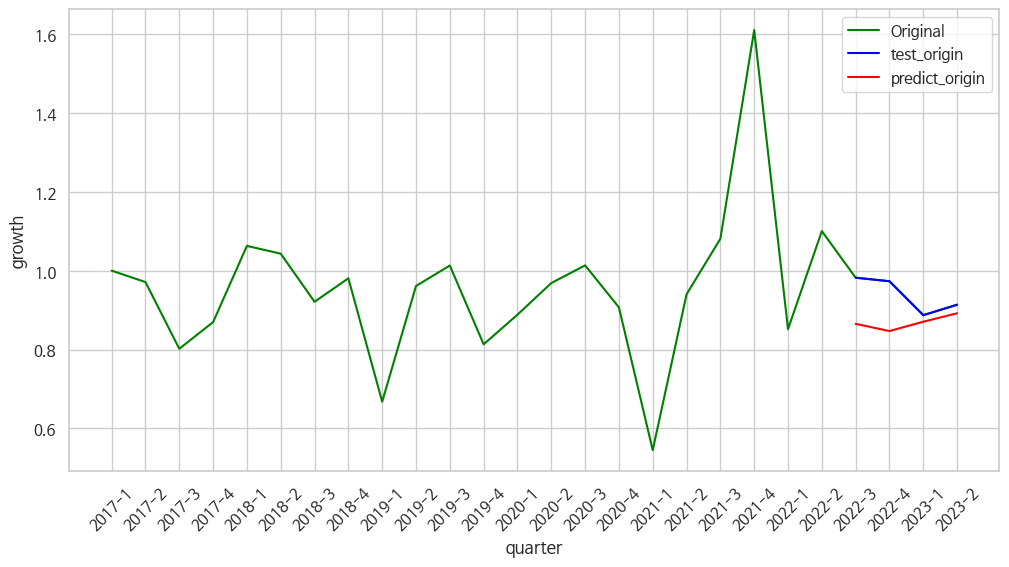

In [145]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [146]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.070321
std      0.059311
min      0.016512
25%      0.020387
50%      0.069279
75%      0.119213
max      0.126215
dtype: float64

In [147]:
### 23년 3분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 20ms/step
[[0.267154]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8295162916183472 


### 시장성

In [148]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   3.731531e+09  1.000000  -2.325581
1   3.623319e+09  0.971001  -4.878049
2   2.905628e+09  0.801925  10.869565
3   2.526568e+09  0.869543   0.000000
4   2.684991e+09  1.062703   2.127660
5   2.800232e+09  1.042921  -2.173913
6   2.579295e+09  0.921100   6.122449
7   2.529120e+09  0.980547   2.000000
8   1.688950e+09  0.667802  -2.040816
9   1.623337e+09  0.961151  -4.255319
10  1.644263e+09  1.012891   2.083333
11  1.337190e+09  0.813246  -2.173913
12  1.187928e+09  0.888377  -4.166667
13  1.150525e+09  0.968514  -7.692308
14  1.165833e+09  1.013305   2.500000
15  1.057356e+09  0.906953   6.976744
16  5.764044e+08  0.545138  -4.878049
17  5.418339e+08  0.940024  -6.250000
18  5.856256e+08  1.080821   0.000000
19  9.426302e+08  1.609612   3.030303
20  8.028484e+08  0.851711   2.941176
21  8.832981e+08  1.100205   0.000000
22  8.674715e+08  0.982082   0.000000
23  8.441380e+08  0.973102   8.108108
24  7.589706e+08  0.887127  -1.096892
25  6.935850

In [149]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [150]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.0680744  0.32127491 0.35532057]
 [0.0475754  0.34612294 0.34129677]]


In [151]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [152]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_21 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [153]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0984
Epoch 1: val_loss improved from inf to 0.02759, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.0984 - val_loss: 0.0276
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0922
Epoch 2: val_loss improved from 0.02759 to 0.02466, saving model to stock_model.h5
1/1 [==============================] - 0s 69ms/step - loss: 0.0922 - val_loss: 0.0247
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0863
Epoch 3: val_loss improved from 0.02466 to 0.02194, saving model to stock_model.h5
1/1 [==============================] - 0s 90ms/step - loss: 0.0863 - val_loss: 0.0219
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0806
Epoch 4: val_loss improved from 0.02194 to 0.01941, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.0806 - val_loss: 0.0194
Epoch 5/100
1/1 [=================

In [154]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 595ms/step
[[0.15638134]
 [0.15251717]
 [0.16372126]
 [0.16895477]]


In [155]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.100484,0.156381
2022-4,0.157233,0.152517
2023-1,0.186070,0.163721
2023-2,0.166796,0.168955


In [156]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 5].values       # 시장성이 ap_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.100484,0.156381,-5.355161e+07,-50769332.0,-2.782281e+06
2022-4,0.157233,0.152517,-5.072695e+07,-50961668.0,2.347213e+05
2023-1,0.186070,0.163721,-4.929159e+07,-50403992.0,1.112404e+06
2023-2,0.166796,0.168955,-5.025096e+07,-50143496.0,-1.074680e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


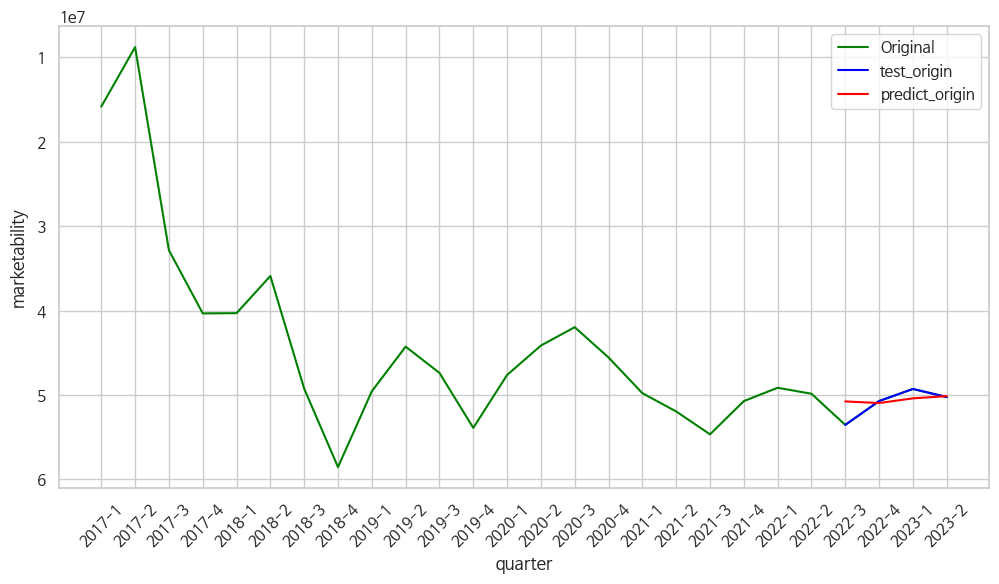

In [157]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [158]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -3.856559e+05
std      1.678318e+06
min     -2.782281e+06
25%     -7.761712e+05
50%      6.362667e+04
75%      4.541420e+05
max      1.112404e+06
dtype: float64

In [159]:
### 23년 3분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 20ms/step
[[0.13933241]]
--------------------------------------------------------------------------------
예측된 시장성  : -51617936.0 


### 순점포증감률

In [160]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '성장성', '시장성']]
y = ap_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.731531e+09  1.000000 -1.583285e+07
1   3.623319e+09  0.971001 -8.778678e+06
2   2.905628e+09  0.801925 -3.284640e+07
3   2.526568e+09  0.869543 -4.033535e+07
4   2.684991e+09  1.062703 -4.031072e+07
5   2.800232e+09  1.042921 -3.590358e+07
6   2.579295e+09  0.921100 -4.925466e+07
7   2.529120e+09  0.980547 -5.855313e+07
8   1.688950e+09  0.667802 -4.956561e+07
9   1.623337e+09  0.961151 -4.427605e+07
10  1.644263e+09  1.012891 -4.739028e+07
11  1.337190e+09  0.813246 -5.390225e+07
12  1.187928e+09  0.888377 -4.763333e+07
13  1.150525e+09  0.968514 -4.414900e+07
14  1.165833e+09  1.013305 -4.197172e+07
15  1.057356e+09  0.906953 -4.556414e+07
16  5.764044e+08  0.545138 -4.979097e+07
17  5.418339e+08  0.940024 -5.195889e+07
18  5.856256e+08  1.080821 -5.466979e+07
19  9.426302e+08  1.609612 -5.073234e+07
20  8.028484e+08  0.851711 -4.915105e+07
21  8.832981e+08  1.100205 -4.985924e+07
22  8.674715e+08  0.982082 -5.355161e+07
23  8.441380e+08

In [161]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (26, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (26, 1)


In [162]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (24, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (24, 1)
[[0.0680744  0.32127491 0.18607016]
 [0.0475754  0.34612294 0.16679569]]


In [163]:
## 학습용 / 평가용 데이터로 분할

# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (20, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (20, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (20, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [164]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [165]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 1: val_loss improved from inf to 0.21408, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2772 - val_loss: 0.2141
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2669
Epoch 2: val_loss improved from 0.21408 to 0.20729, saving model to stock_model.h5
1/1 [==============================] - 0s 88ms/step - loss: 0.2669 - val_loss: 0.2073
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2569
Epoch 3: val_loss improved from 0.20729 to 0.20076, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2569 - val_loss: 0.2008
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2472
Epoch 4: val_loss improved from 0.20076 to 0.19442, saving model to stock_model.h5
1/1 [==============================] - 0s 93ms/step - loss: 0.2472 - val_loss: 0.1944
Epoch 5/100
1/1 [=================

In [166]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 602ms/step
[[0.36185932]
 [0.3737609 ]
 [0.3528271 ]
 [0.35769162]]


In [167]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-3,0.414414,0.361859
2022-4,0.851230,0.373761
2023-1,0.355321,0.352827
2023-2,0.341297,0.357692


In [168]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-3,0.414414,0.361859,0.000000,-0.975521,0.975521
2022-4,0.851230,0.373761,8.108108,-0.754605,8.862713
2023-1,0.355321,0.352827,-1.096892,-1.143176,0.046283
2023-2,0.341297,0.357692,-1.357201,-1.052881,-0.304319


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


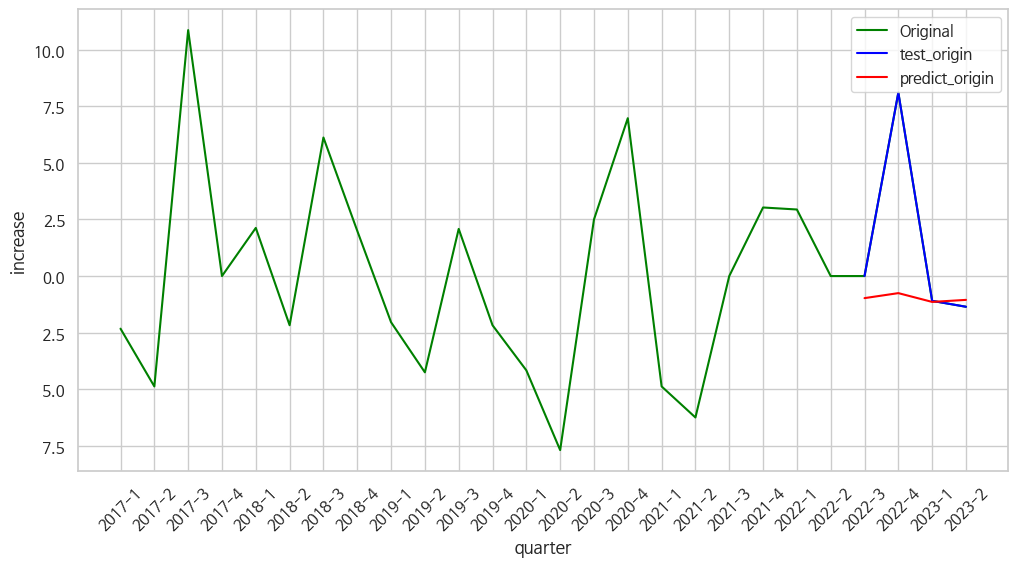

In [169]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [170]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     2.395050
std      4.345459
min     -0.304319
25%     -0.041367
50%      0.510902
75%      2.947319
max      8.862713
dtype: float64

In [171]:
### 23년 3분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 17ms/step
[[0.3479872]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.233013391494751 


### 추가

In [172]:
ap_bread.loc[26] = ['2023-3', '제과점', sales, growth, increase, marketability]

<ipython-input-172-50deb59c3c73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bread.loc[26] = ['2023-3', '제과점', sales, growth, increase, marketability]


In [173]:
ap_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,3.731531e+09,1.000000,-2.325581,-1.583285e+07
1,2017-2,제과점,3.623319e+09,0.971001,-4.878049,-8.778678e+06
2,2017-3,제과점,2.905628e+09,0.801925,10.869565,-3.284640e+07
3,2017-4,제과점,2.526568e+09,0.869543,0.000000,-4.033535e+07
4,2018-1,제과점,2.684991e+09,1.062703,2.127660,-4.031072e+07
5,2018-2,제과점,2.800232e+09,1.042921,-2.173913,-3.590358e+07
6,2018-3,제과점,2.579295e+09,0.921100,6.122449,-4.925466e+07
7,2018-4,제과점,2.529120e+09,0.980547,2.000000,-5.855313e+07
8,2019-1,제과점,1.688950e+09,0.667802,-2.040816,-4.956561e+07
9,2019-2,제과점,1.623337e+09,0.961151,-4.255319,-4.427605e+07


## 23년 4분기 매출, 성장성, 시장성, 순점포증감률 예측 및 원본데이터에 추가

### 매출

In [174]:
### X / y 데이터 생성
X = ap_bread[['성장성', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -1.583285e+07  -2.325581
1   0.971001 -8.778678e+06  -4.878049
2   0.801925 -3.284640e+07  10.869565
3   0.869543 -4.033535e+07   0.000000
4   1.062703 -4.031072e+07   2.127660
5   1.042921 -3.590358e+07  -2.173913
6   0.921100 -4.925466e+07   6.122449
7   0.980547 -5.855313e+07   2.000000
8   0.667802 -4.956561e+07  -2.040816
9   0.961151 -4.427605e+07  -4.255319
10  1.012891 -4.739028e+07   2.083333
11  0.813246 -5.390225e+07  -2.173913
12  0.888377 -4.763333e+07  -4.166667
13  0.968514 -4.414900e+07  -7.692308
14  1.013305 -4.197172e+07   2.500000
15  0.906953 -4.556414e+07   6.976744
16  0.545138 -4.979097e+07  -4.878049
17  0.940024 -5.195889e+07  -6.250000
18  1.080821 -5.466979e+07   0.000000
19  1.609612 -5.073234e+07   3.030303
20  0.851711 -4.915105e+07   2.941176
21  1.100205 -4.985924e+07   0.000000
22  0.982082 -5.355161e+07   0.000000
23  0.973102 -5.072695e+07   8.108108
24  0.887127 -4.929159e+07  -1.096892
25  0.913577

In [175]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [176]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.34612294 0.16679569 0.34129677]
 [0.26715401 0.13933236 0.34798721]]


In [177]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [178]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_25 (LSTM)              (None, 32)                12416     
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [179]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2370
Epoch 1: val_loss improved from inf to 0.00802, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.2370 - val_loss: 0.0080
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2278
Epoch 2: val_loss improved from 0.00802 to 0.00661, saving model to stock_model.h5
1/1 [==============================] - 0s 96ms/step - loss: 0.2278 - val_loss: 0.0066
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2190
Epoch 3: val_loss improved from 0.00661 to 0.00539, saving model to stock_model.h5
1/1 [==============================] - 0s 76ms/step - loss: 0.2190 - val_loss: 0.0054
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2105
Epoch 4: val_loss improved from 0.00539 to 0.00436, saving model to stock_model.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.2105 - val_loss: 0.0044
Epoch 5/100
1/1 [=================

In [180]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 612ms/step
[[0.07369499]
 [0.07835492]
 [0.08016181]
 [0.06726329]]


In [181]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.094775,0.073695
2023-1,0.068074,0.078355
2023-2,0.047575,0.080162
2023-3,0.067263,0.067263


In [182]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.094775,0.073695,844138041.0,776898624.0,67239417.0
2023-1,0.068074,0.078355,758970624.0,791762368.0,-32791744.0
2023-2,0.047575,0.080162,693585024.0,797525760.0,-103940736.0
2023-3,0.067263,0.067263,756383360.0,756383424.0,-64.0


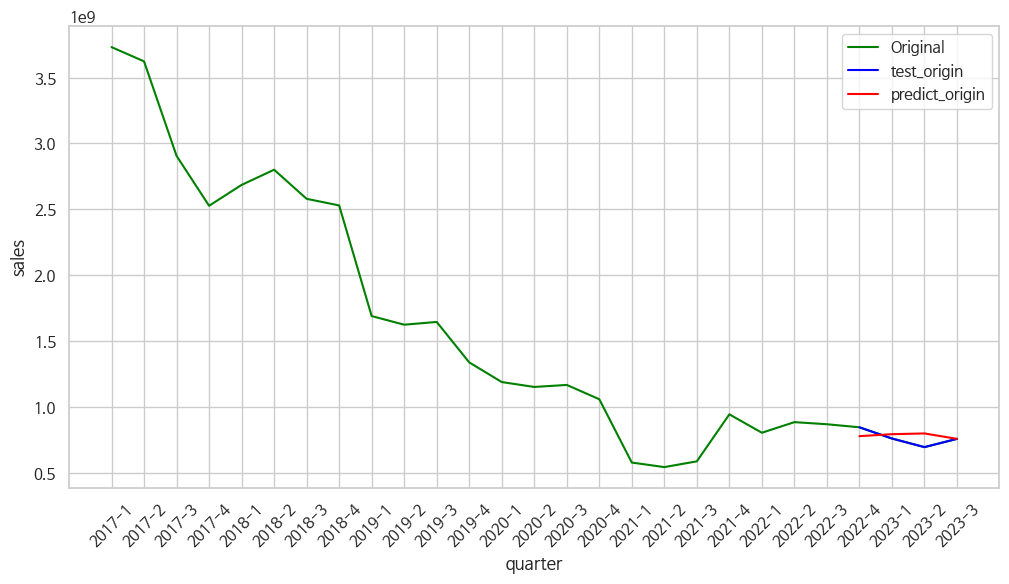

In [183]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('sales')
plt.legend()
plt.show()

In [184]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean    -1.737328e+07
std      7.116364e+07
min     -1.039407e+08
25%     -5.057899e+07
50%     -1.639590e+07
75%      1.680981e+07
max      6.723942e+07
dtype: float64

In [185]:
### 23년 4분기 매출 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

sales_pred_last = loaded_model.predict(X_last_test)
print(sales_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
sales = mmsy.inverse_transform(sales_pred_last)[0,0]
print(f'예측된 매출  : {sales} ')

1/1 [==============================] - 0s 22ms/step
[[0.06677464]]
--------------------------------------------------------------------------------
예측된 매출  : 754824768.0 


### 성장성

In [186]:
X = ap_bread[['분기당_매출_금액', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['성장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액           시장성     순점포증감률
0   3.731531e+09 -1.583285e+07  -2.325581
1   3.623319e+09 -8.778678e+06  -4.878049
2   2.905628e+09 -3.284640e+07  10.869565
3   2.526568e+09 -4.033535e+07   0.000000
4   2.684991e+09 -4.031072e+07   2.127660
5   2.800232e+09 -3.590358e+07  -2.173913
6   2.579295e+09 -4.925466e+07   6.122449
7   2.529120e+09 -5.855313e+07   2.000000
8   1.688950e+09 -4.956561e+07  -2.040816
9   1.623337e+09 -4.427605e+07  -4.255319
10  1.644263e+09 -4.739028e+07   2.083333
11  1.337190e+09 -5.390225e+07  -2.173913
12  1.187928e+09 -4.763333e+07  -4.166667
13  1.150525e+09 -4.414900e+07  -7.692308
14  1.165833e+09 -4.197172e+07   2.500000
15  1.057356e+09 -4.556414e+07   6.976744
16  5.764044e+08 -4.979097e+07  -4.878049
17  5.418339e+08 -5.195889e+07  -6.250000
18  5.856256e+08 -5.466979e+07   0.000000
19  9.426302e+08 -5.073234e+07   3.030303
20  8.028484e+08 -4.915105e+07   2.941176
21  8.832981e+08 -4.985924e+07   0.000000
22  8.674715e+08 -5.355161e+07   0

In [187]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [188]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.0475754  0.16679569 0.34129677]
 [0.06726327 0.13933236 0.34798721]]


In [189]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [190]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_27 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [191]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.1407
Epoch 1: val_loss improved from inf to 0.32145, saving model to stock_model.h5
1/1 [==============================] - 4s 4s/step - loss: 0.1407 - val_loss: 0.3214
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.1331
Epoch 2: val_loss improved from 0.32145 to 0.31345, saving model to stock_model.h5
1/1 [==============================] - 0s 94ms/step - loss: 0.1331 - val_loss: 0.3134
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.1258
Epoch 3: val_loss improved from 0.31345 to 0.30567, saving model to stock_model.h5
1/1 [==============================] - 0s 67ms/step - loss: 0.1258 - val_loss: 0.3057
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1189
Epoch 4: val_loss improved from 0.30567 to 0.29808, saving model to stock_model.h5
1/1 [==============================] - 0s 68ms/step - loss: 0.1189 - val_loss: 0.2981
Epoch 5/100
1/1 [=================

In [192]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 792ms/step
[[0.28347206]
 [0.3057632 ]
 [0.3257572 ]
 [0.267154  ]]


In [193]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.402043,0.283472
2023-1,0.321275,0.305763
2023-2,0.346123,0.325757
2023-3,0.267154,0.267154


In [194]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 3].values       # 성장성이 ap_bread의 index 3번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.402043,0.283472,0.973102,0.846886,0.126215
2023-1,0.321275,0.305763,0.887127,0.870615,0.016512
2023-2,0.346123,0.325757,0.913577,0.891898,0.021679
2023-3,0.267154,0.267154,0.829516,0.829516,0.000000


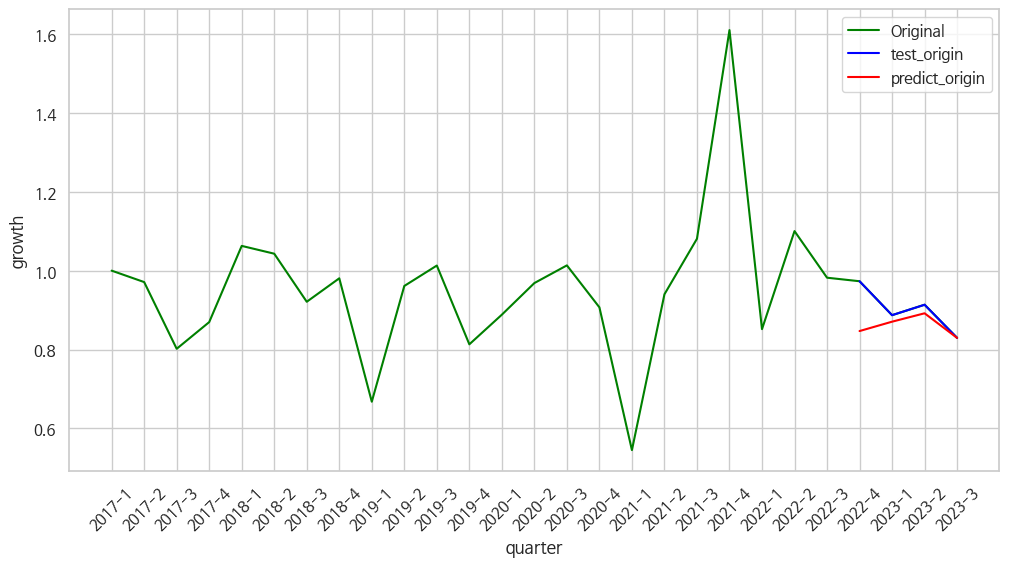

In [195]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['성장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('growth')
plt.legend()
plt.show()

In [196]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     0.041101
std      0.057491
min      0.000000
25%      0.012384
50%      0.019095
75%      0.047813
max      0.126215
dtype: float64

In [197]:
### 23년 4분기 성장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

growth_pred_last = loaded_model.predict(X_last_test)
print(growth_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
growth = mmsy.inverse_transform(growth_pred_last)[0,0]
print(f'예측된 성장성  : {growth} ')

1/1 [==============================] - 0s 22ms/step
[[0.2631737]]
--------------------------------------------------------------------------------
예측된 성장성  : 0.8252793550491333 


###시장성

In [198]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '성장성', '순점포증감률']]
y = ap_bread.loc[:,['시장성']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성     순점포증감률
0   3.731531e+09  1.000000  -2.325581
1   3.623319e+09  0.971001  -4.878049
2   2.905628e+09  0.801925  10.869565
3   2.526568e+09  0.869543   0.000000
4   2.684991e+09  1.062703   2.127660
5   2.800232e+09  1.042921  -2.173913
6   2.579295e+09  0.921100   6.122449
7   2.529120e+09  0.980547   2.000000
8   1.688950e+09  0.667802  -2.040816
9   1.623337e+09  0.961151  -4.255319
10  1.644263e+09  1.012891   2.083333
11  1.337190e+09  0.813246  -2.173913
12  1.187928e+09  0.888377  -4.166667
13  1.150525e+09  0.968514  -7.692308
14  1.165833e+09  1.013305   2.500000
15  1.057356e+09  0.906953   6.976744
16  5.764044e+08  0.545138  -4.878049
17  5.418339e+08  0.940024  -6.250000
18  5.856256e+08  1.080821   0.000000
19  9.426302e+08  1.609612   3.030303
20  8.028484e+08  0.851711   2.941176
21  8.832981e+08  1.100205   0.000000
22  8.674715e+08  0.982082   0.000000
23  8.441380e+08  0.973102   8.108108
24  7.589706e+08  0.887127  -1.096892
25  6.935850

In [199]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [200]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.0475754  0.34612294 0.34129677]
 [0.06726327 0.26715401 0.34798721]]


In [201]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [202]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_29 (LSTM)              (None, 32)                12416     
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [203]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.0984
Epoch 1: val_loss improved from inf to 0.02509, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.0984 - val_loss: 0.0251
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.0922
Epoch 2: val_loss improved from 0.02509 to 0.02232, saving model to stock_model.h5
1/1 [==============================] - 0s 81ms/step - loss: 0.0922 - val_loss: 0.0223
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.0863
Epoch 3: val_loss improved from 0.02232 to 0.01974, saving model to stock_model.h5
1/1 [==============================] - 0s 86ms/step - loss: 0.0863 - val_loss: 0.0197
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.0806
Epoch 4: val_loss improved from 0.01974 to 0.01735, saving model to stock_model.h5
1/1 [==============================] - 0s 82ms/step - loss: 0.0806 - val_loss: 0.0174
Epoch 5/100
1/1 [=================

In [204]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 588ms/step
[[0.14142692]
 [0.15204045]
 [0.15681502]
 [0.12951669]]


In [205]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.157233,0.141427
2023-1,0.186070,0.152040
2023-2,0.166796,0.156815
2023-3,0.139332,0.129517


In [206]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 5].values       # 시장성이 ap_bread의 index 5번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.157233,0.141427,-5.072695e+07,-51513684.0,7.867373e+05
2023-1,0.186070,0.152040,-4.929159e+07,-50985400.0,1.693812e+06
2023-2,0.166796,0.156815,-5.025096e+07,-50747748.0,4.967840e+05
2023-3,0.139332,0.129517,-5.161794e+07,-52106504.0,4.885680e+05


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


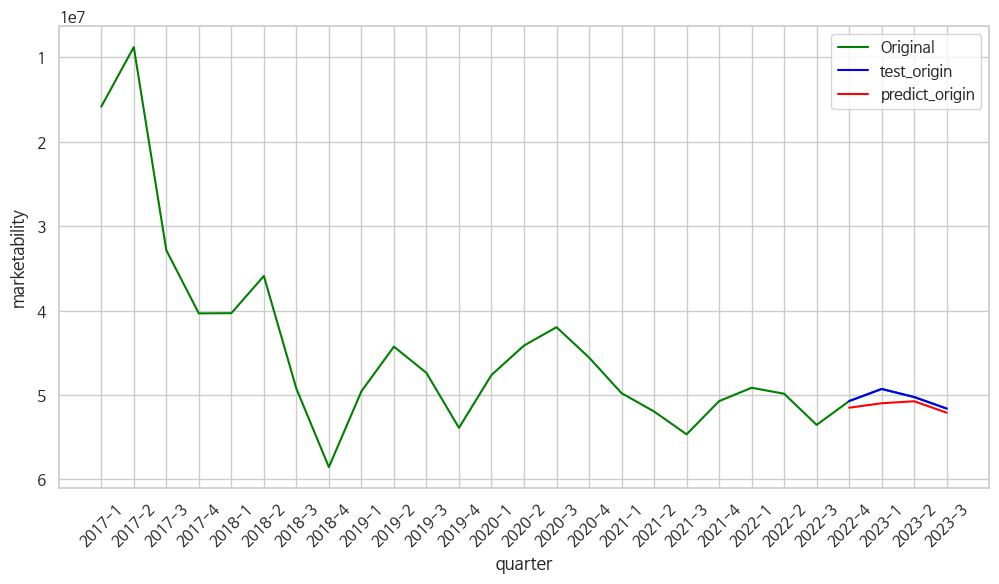

In [207]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['시장성'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('marketability')
plt.legend()
plt.show()

In [208]:
### error의 요약 통계량
error.describe()

count    4.000000e+00
mean     8.664753e+05
std      5.687207e+05
min      4.885680e+05
25%      4.947300e+05
50%      6.417607e+05
75%      1.013506e+06
max      1.693812e+06
dtype: float64

In [209]:
### 23년 4분기 시장성 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

marketability_pred_last = loaded_model.predict(X_last_test)
print(marketability_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
marketability = mmsy.inverse_transform(marketability_pred_last)[0,0]
print(f'예측된 시장성  : {marketability} ')

1/1 [==============================] - 0s 18ms/step
[[0.12838455]]
--------------------------------------------------------------------------------
예측된 시장성  : -52162856.0 


### 순점포증감률

In [210]:
### X / y 데이터 생성
X = ap_bread[['분기당_매출_금액', '성장성', '시장성']]
y = ap_bread.loc[:,['순점포증감률']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

       분기당_매출_금액       성장성           시장성
0   3.731531e+09  1.000000 -1.583285e+07
1   3.623319e+09  0.971001 -8.778678e+06
2   2.905628e+09  0.801925 -3.284640e+07
3   2.526568e+09  0.869543 -4.033535e+07
4   2.684991e+09  1.062703 -4.031072e+07
5   2.800232e+09  1.042921 -3.590358e+07
6   2.579295e+09  0.921100 -4.925466e+07
7   2.529120e+09  0.980547 -5.855313e+07
8   1.688950e+09  0.667802 -4.956561e+07
9   1.623337e+09  0.961151 -4.427605e+07
10  1.644263e+09  1.012891 -4.739028e+07
11  1.337190e+09  0.813246 -5.390225e+07
12  1.187928e+09  0.888377 -4.763333e+07
13  1.150525e+09  0.968514 -4.414900e+07
14  1.165833e+09  1.013305 -4.197172e+07
15  1.057356e+09  0.906953 -4.556414e+07
16  5.764044e+08  0.545138 -4.979097e+07
17  5.418339e+08  0.940024 -5.195889e+07
18  5.856256e+08  1.080821 -5.466979e+07
19  9.426302e+08  1.609612 -5.073234e+07
20  8.028484e+08  0.851711 -4.915105e+07
21  8.832981e+08  1.100205 -4.985924e+07
22  8.674715e+08  0.982082 -5.355161e+07
23  8.441380e+08

In [211]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (27, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (27, 1)


In [212]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (25, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (25, 1)
[[0.0475754  0.34612294 0.16679569]
 [0.06726327 0.26715401 0.13933236]]


In [213]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (21, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (21, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (21, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [214]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_31 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [215]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2772
Epoch 1: val_loss improved from inf to 0.20847, saving model to stock_model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.2772 - val_loss: 0.2085
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2669
Epoch 2: val_loss improved from 0.20847 to 0.20169, saving model to stock_model.h5
1/1 [==============================] - 0s 80ms/step - loss: 0.2669 - val_loss: 0.2017
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2569
Epoch 3: val_loss improved from 0.20169 to 0.19515, saving model to stock_model.h5
1/1 [==============================] - 0s 71ms/step - loss: 0.2569 - val_loss: 0.1952
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.2472
Epoch 4: val_loss improved from 0.19515 to 0.18881, saving model to stock_model.h5
1/1 [==============================] - 0s 74ms/step - loss: 0.2472 - val_loss: 0.1888
Epoch 5/100
1/1 [=================

In [216]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 1s 1s/step
[[0.3737609 ]
 [0.3528271 ]
 [0.35769162]
 [0.34798723]]


In [217]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2022-4,0.851230,0.373761
2023-1,0.355321,0.352827
2023-2,0.341297,0.357692
2023-3,0.347987,0.347987


In [218]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 4].values       # 순점포증감률이 ap_bread의 index 4번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2022-4,0.851230,0.373761,8.108108,-0.754605,8.862713e+00
2023-1,0.355321,0.352827,-1.096892,-1.143176,4.628348e-02
2023-2,0.341297,0.357692,-1.357201,-1.052881,-3.043191e-01
2023-3,0.347987,0.347987,-1.233013,-1.233013,-5.960464e-07


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


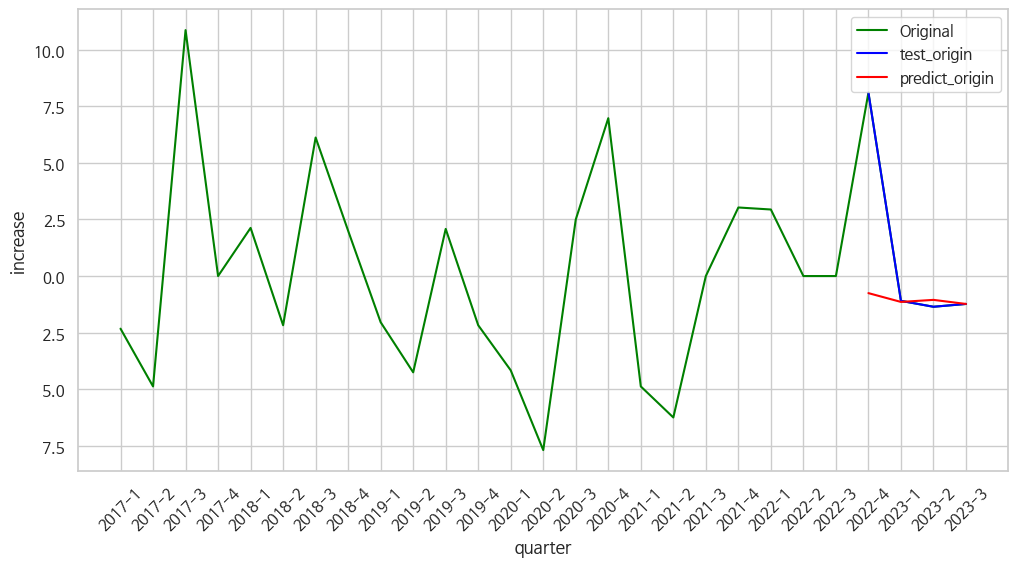

In [219]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(ap_bread['분기'], ap_bread['순점포증감률'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('quarter')
plt.ylabel('increase')
plt.legend()
plt.show()

In [220]:
### error의 요약 통계량
error.describe()

count    4.000000
mean     2.151169
std      4.477065
min     -0.304319
25%     -0.076080
50%      0.023141
75%      2.250391
max      8.862713
dtype: float64

In [221]:
### 23년 2분기 순점포증감률 예측하기 --> 마지막 테스트 데이터 이용

# 모양 변환
X_last_test = X_last_test.reshape((1,2,3))

increase_pred_last = loaded_model.predict(X_last_test)
print(increase_pred_last)

print('-'*80)

# 스케일링 이전의 상태로 복원
increase = mmsy.inverse_transform(increase_pred_last)[0,0]
print(f'예측된 순점포증감률  : {increase} ')

1/1 [==============================] - 0s 42ms/step
[[0.33872148]]
--------------------------------------------------------------------------------
예측된 순점포증감률  : -1.405002474784851 


### 추가

In [222]:
ap_bread.loc[27] = ['2023-4', '제과점', sales, growth, increase, marketability]

<ipython-input-222-1ab7a52dc39e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap_bread.loc[27] = ['2023-4', '제과점', sales, growth, increase, marketability]


In [223]:
final_ap_bread = ap_bread
final_ap_bread

,분기,업종명,분기당_매출_금액,성장성,순점포증감률,시장성
0,2017-1,제과점,3.731531e+09,1.000000,-2.325581,-1.583285e+07
1,2017-2,제과점,3.623319e+09,0.971001,-4.878049,-8.778678e+06
2,2017-3,제과점,2.905628e+09,0.801925,10.869565,-3.284640e+07
3,2017-4,제과점,2.526568e+09,0.869543,0.000000,-4.033535e+07
4,2018-1,제과점,2.684991e+09,1.062703,2.127660,-4.031072e+07
5,2018-2,제과점,2.800232e+09,1.042921,-2.173913,-3.590358e+07
6,2018-3,제과점,2.579295e+09,0.921100,6.122449,-4.925466e+07
7,2018-4,제과점,2.529120e+09,0.980547,2.000000,-5.855313e+07
8,2019-1,제과점,1.688950e+09,0.667802,-2.040816,-4.956561e+07
9,2019-2,제과점,1.623337e+09,0.961151,-4.255319,-4.427605e+07


## 최종결과

In [224]:
### X / y 데이터 생성
X = ap_bread[['성장성', '시장성', '순점포증감률']]
y = ap_bread.loc[:,['분기당_매출_금액']]

# 결과 확인하기
print(X)
print('-'*80)
print(y)

         성장성           시장성     순점포증감률
0   1.000000 -1.583285e+07  -2.325581
1   0.971001 -8.778678e+06  -4.878049
2   0.801925 -3.284640e+07  10.869565
3   0.869543 -4.033535e+07   0.000000
4   1.062703 -4.031072e+07   2.127660
5   1.042921 -3.590358e+07  -2.173913
6   0.921100 -4.925466e+07   6.122449
7   0.980547 -5.855313e+07   2.000000
8   0.667802 -4.956561e+07  -2.040816
9   0.961151 -4.427605e+07  -4.255319
10  1.012891 -4.739028e+07   2.083333
11  0.813246 -5.390225e+07  -2.173913
12  0.888377 -4.763333e+07  -4.166667
13  0.968514 -4.414900e+07  -7.692308
14  1.013305 -4.197172e+07   2.500000
15  0.906953 -4.556414e+07   6.976744
16  0.545138 -4.979097e+07  -4.878049
17  0.940024 -5.195889e+07  -6.250000
18  1.080821 -5.466979e+07   0.000000
19  1.609612 -5.073234e+07   3.030303
20  0.851711 -4.915105e+07   2.941176
21  1.100205 -4.985924e+07   0.000000
22  0.982082 -5.355161e+07   0.000000
23  0.973102 -5.072695e+07   8.108108
24  0.887127 -4.929159e+07  -1.096892
25  0.913577

In [225]:
### Normalization 진행

# MinMaxScaler 임폴트
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
mmsx = MinMaxScaler()
mmsy = MinMaxScaler()

# 스케일링 실행
X_mms = mmsx.fit_transform(X)
y_mms = mmsy.fit_transform(y)

#  결과 확인하기
print(f'X_mms 모양 : {X_mms.shape}')
print('-'*80)
print(f'y_mms의 모양 : {y_mms.shape}')

X_mms 모양 : (28, 3)
--------------------------------------------------------------------------------
y_mms의 모양 : (28, 1)


In [226]:
# window_size=2인 X, y 데이터 생성
X_data, y_data = make_dataset(X_mms, y_mms, 2)

# 결과 확인하기
print(f'X_data 데이터의 모양 : {X_data.shape}')
print('-'*80)
print(f'y_data 데이터의 모양 : {y_data.shape}')


### 시계열 분석에서 마지막 테스트 데이터 생성
X_last_test = make_last_dataset(X_mms, 2)
print(X_last_test)

X_data 데이터의 모양 : (26, 2, 3)
--------------------------------------------------------------------------------
y_data 데이터의 모양 : (26, 1)
[[0.26715401 0.13933236 0.34798721]
 [0.2631737  0.12838458 0.33872149]]


In [227]:
# 평가용 데이터 크기 설정
TEST_SIZE = 4

# 학습용 데이터 생성
X_train = X_data[:-TEST_SIZE, :, :]
y_train = y_data[:-TEST_SIZE, :]

# 평가용 데이터 생성
X_test = X_data[-TEST_SIZE:, :, :]
y_test = y_data[-TEST_SIZE:, :]

## 학습용 데이터를 학습용과 검증용으로 분할

# 필요한 함수 임폴트
# from sklearn.model_selection import train_test_split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

# 결과 확인하기
print(f'학습용 데이터의 모양 : {X_train.shape}')
print('-'*80)
print(f'학습용 레이블의 모양 : {y_train.shape}')
print('-'*80)
# print(f'검증용 데이터의 모양 : {X_valid.shape}')
# print('-'*80)
# print(f'검증용 레이블의 모양 : {y_valid.shape}')
# print('-'*80)
print(f'평가용 데이터의 모양 : {X_test.shape}')
print('-'*80)
print(f'평가용 레이블의 모양 : {y_test.shape}')

# 결과 확인하기
print(f'X_train의 모양 : {X_train.shape}')
print('-'*80)
print(f'y_train의 모양 : {y_train.shape}')
print('-'*80)
print(f'X_test의 모양 : {X_test.shape}')
print('-'*80)
print(f'y_test의 모양 : {y_test.shape}')

학습용 데이터의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
학습용 레이블의 모양 : (22, 1)
--------------------------------------------------------------------------------
평가용 데이터의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
평가용 레이블의 모양 : (4, 1)
X_train의 모양 : (22, 2, 3)
--------------------------------------------------------------------------------
y_train의 모양 : (22, 1)
--------------------------------------------------------------------------------
X_test의 모양 : (4, 2, 3)
--------------------------------------------------------------------------------
y_test의 모양 : (4, 1)


In [228]:
# 랜덤 시드 설정
random.seed(0)
tf.random.set_seed(0)
np.random.seed(0)
initializer = tf.keras.initializers.GlorotUniform(seed=0)

# 모델 정의
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=64,
                               return_sequences=True,
                               kernel_initializer=initializer,
                               input_shape=X_train[0].shape))
model.add(tf.keras.layers.LSTM(units=32, kernel_initializer=initializer))
model.add(tf.keras.layers.Dense(1, kernel_initializer=initializer))

# 모델 컴파일
model.compile(loss='mean_squared_error', optimizer='adam')

# 모델 확인
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 2, 64)             17408     
                                                                 
 lstm_33 (LSTM)              (None, 32)                12416     
                                                                 
 dense_16 (Dense)            (None, 1)                 33        
                                                                 
Total params: 29,857
Trainable params: 29,857
Non-trainable params: 0
_________________________________________________________________


In [229]:
# 과대 적합을 방지하기 위한 조기 종료 설정
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                              verbose=1,
                                              patience=2)

# 최적의 학습 결과를 저장하기 위한 ModelCheckpoint 설정
save_file_path = 'stock_model.h5'
checkpoint = tf.keras.callbacks.ModelCheckpoint(save_file_path,
                                                monitor='val_loss',
                                                verbose=1,
                                                save_best_only=True)

# 학습 진행
history = model.fit(X_train,
                    y_train,
                    batch_size=256,
                    epochs=100,
                    validation_split=0.25,
                    callbacks=[early_stop, checkpoint])

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 0.2222
Epoch 1: val_loss improved from inf to 0.00964, saving model to stock_model.h5
1/1 [==============================] - 10s 10s/step - loss: 0.2222 - val_loss: 0.0096
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 0.2136
Epoch 2: val_loss improved from 0.00964 to 0.00792, saving model to stock_model.h5
1/1 [==============================] - 0s 136ms/step - loss: 0.2136 - val_loss: 0.0079
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 0.2053
Epoch 3: val_loss improved from 0.00792 to 0.00641, saving model to stock_model.h5
1/1 [==============================] - 0s 98ms/step - loss: 0.2053 - val_loss: 0.0064
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 0.1974
Epoch 4: val_loss improved from 0.00641 to 0.00508, saving model to stock_model.h5
1/1 [==============================] - 0s 85ms/step - loss: 0.1974 - val_loss: 0.0051
Epoch 5/100
1/1 [==============

In [230]:
# 학습된 모델을 불러오기
loaded_model = tf.keras.models.load_model('stock_model.h5')

# 테스트 데이터를 이용하여 예측하기
pred = loaded_model.predict(X_test)
print(pred)

1/1 [==============================] - 2s 2s/step
[[0.09982731]
 [0.10283896]
 [0.0860497 ]
 [0.08519284]]


In [231]:
## 평가용 데이터에 대한 예측의 결과 --> 데이터프레임 생성
df_test = pd.DataFrame(y_test, columns=['y_test'])
df_test['predict'] = pred
date = ap_bread.iloc[-4:, 0]
df_test.index = date

# 결과 확인하기
df_test

,y_test,predict
분기,,
2023-1,0.068074,0.099827
2023-2,0.047575,0.102839
2023-3,0.067263,0.086050
2023-4,0.066775,0.085193


In [232]:
### 평가용 데이터에 대한 예측의 결과 --> 스케일링 이전의 상태로 복원
predict_inverse = mmsy.inverse_transform(pred)
df_test['test_origin'] = ap_bread.iloc[-len(pred):, 2].values       # 분기당 매출 금액이 ap_bread의 index 2번 자리에 있음
df_test['predict_origin'] = predict_inverse
error = df_test['test_origin'] - df_test['predict_origin']
df_test['error'] = error

# 결과 확인하기
df_test

,y_test,predict,test_origin,predict_origin,error
분기,,,,,
2023-1,0.068074,0.099827,758970624.0,860252736.0,-101282112.0
2023-2,0.047575,0.102839,693585024.0,869859008.0,-176273984.0
2023-3,0.067263,0.086050,756383360.0,816306368.0,-59923008.0
2023-4,0.066775,0.085193,754824768.0,813573248.0,-58748480.0


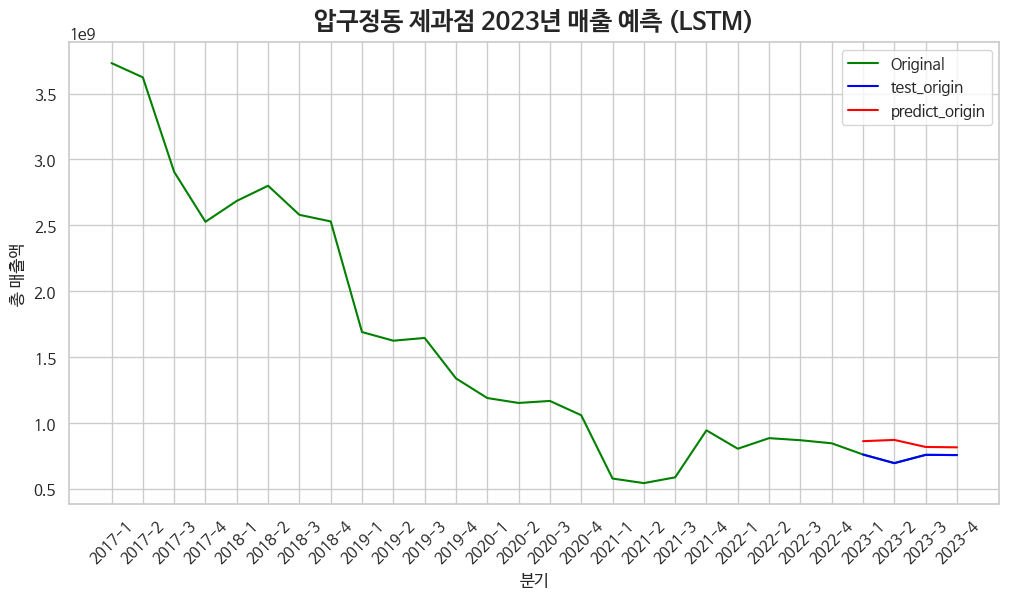

In [234]:
df_test = df_test.reset_index()

### 결과 시각화
plt.figure(figsize=(12, 6))

plt.title('압구정동 제과점 2023년 매출 예측 (LSTM)', fontsize = 18, fontweight='bold', pad =10)

plt.plot(ap_bread['분기'], ap_bread['분기당_매출_금액'], color='green', label = 'Original')
plt.plot(df_test['분기'], df_test['test_origin'], color='blue', label = 'test_origin')
plt.plot(df_test['분기'], df_test['predict_origin'], color='red', label = 'predict_origin')
plt.xticks(rotation=45)
plt.xlabel('분기')
plt.ylabel('총 매출액')
plt.legend()
plt.show()